<a href="https://colab.research.google.com/github/neillinehan/NeilLinehanPortfolio/blob/main/WGU_MSDA/D206/d206_linehan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D206 Data Cleaning Performance Assessment
Submitted by Neil Linehan, Student ID 012311228, for WGU's MSDA program

# Part I: Research Question

## A1: QUESTION OR DECISION

For this performance assessment, I propose the following research question:

*‘What patient factors influence hospital readmission rates?’*

Hospital readmission rates are an important metric tracked by medical institutions. Since readmission indicates a failure to accomplish the intended outcome of the initial hospital visit, it is seen as a sign that substandard care was administered (CMS Office of Minority Health, 2020). For this reason, and due to disproportionate readmission rates for vulnerable populations, federal government organizations penalize hospitals for readmissions. This system incentivizes medical businesses to reduce readmission rates, making an analysis of the root causes relevant to medical business financial interests. The dataset that will be cleaned to analyze this research question comes from a chain of hospitals and provides many vital variables necessary to answer such a question.

## A2: REQUIRED VARIABLES

The table below contains the information for every variable within the data file, indicating its data type, describing the variable, and presenting an example of the variable. Note that each example is from the same row of data.

### Code for accessing examples

In [ ]:
#the examples in the below table were generated with this line of code
import pandas as pd
data_df = pd.read_csv('/content/medical_raw_data.csv', index_col=0)
data_df.dropna(how='any').iloc[10,:];

| Variable | Data type | Description | Example |
| --- | --- | --- | --- |
| CaseOrder | Quantitative | Serial primary key | 10 |
| Customer_id | Qualitative | ID of patient | Z229385 |
| Interaction | Qualitative | ID for patient-related activities | 5acd5dd3-f0ae-41c7-9540-cf3e4ecb2e27 |
| UID | Qualitative | ID for patient-related activities | 687e7ba1b80022c310fa2d4b00db199a |
| City | Qualitative | Patient city | Paynesville |
| State | Qualitative | Patient state | MN |
| County | Qualitative | Patient county | Stearns |
| Zip | Qualitative | Patient zip code | 56362 |
| Lat | Quantitative | Latitude of patient residence | 45.40325 |
| Lng | Quantitative | Longitutde of patient residence | -94.71424 |
| Population | Quantitative | Population within 1-mile of patient residence | 5840 |
| Area | Qualitative | Development classification | Urban |
| Timezone | Qualitative | Patient time-zone | America/Chicago |
| Job | Qualitative | Patient job (or primary insurance holder) | Production assistant, radio |
| Children | Quantitative | Patient children | 2.0 |
| Age | Quantitative | Patient age | 78.0 |
| Education | Qualitative | Patient education | Some College, 1 or More Years, No Degree |
| Employment | Qualitative | Patient employment status | Full Time |
| Income | Quantitative | Patient annual income (or primary insurance holder) | 38965.22 |
| Marital | Qualitative | Patient marital status (or primary insurance holder) | Never Married |
| Gender | Qualitative | Patient gender | Female |
| ReAdmis | Qualitative | Was patient readmitted within a month of discharge? | No |
| VitD_levels | Quantitative | Patient vitamin D levels (ng/mL) | 19.628554 |
| Doc_visits | Quantitative | Primary physician visits during initial hospital stay | 7 |
| Full_meals_eaten | Quantitative | Full meals eaten while hospitalized | 1 |
| VitD_supp | Quantitative | Vitamin D supplements given during stay | 2 |
| Soft_drink | Qualitative | Does the patient regularly drink 3 or greater sodas per day? | No |
| Initial_admin | Qualitative | Patient's intial admission type | Emergency Admission |
| HighBlood | Qualitative | Does the patient have high blood pressure? | Yes |
| Stroke | Qualitative | Has the patient had a stroke? | No |
| Complication_risk | Qualitative | Patient complication risk level | High |
| Overweight | Qualitative | Is the patient considered overweight for their height, gender, and age? | 1.0 |
| Arthritis | Qualitative | Does the patient have arthritis? | No |
| Diabetes | Qualitative | Does the patient have diabetes? | No |
| Hyperlipidemia | Qualitative | Does the patient have hyperlipidemia? | No |
| BackPain | Qualitative | Does the patient have chronic back pain? | No |
| Anxiety | Qualitative | Does the patient have an anxiety disorder? | 0.0 |
| Allergic_rhinitis | Qualitative | Does the patient have allergic rhinitis? | Yes |
| Reflux_esophagitis | Qualitative | Does the patient have reflux esophagitis? | Yes |
| Asthma | Qualitative | Does the patient have asthma? | Yes |
| Services | Qualitative | Patient primary service received | Blood Work |
| Initial_days | Quantitative | Length of patient's intial stay (days) | 1.632554 |
| TotalCharge | Quantitative | Average daily charge to the patient during their hospital stay, excluding specialized treatments | 3709.547665 |
| Additional_charges | Quantitative | Average cost billed to the patient for various procedures, anesthesiology, medications, treatments, etc. | 26225.98991 |
| Item1 | Quantitative | Patient’s importance rating (1=most important, 8= least) for: Timely admission | 5 |
| Item2 | Quantitative | Patient’s importance rating (1=most important, 8= least) for: Timely treatment | 5 |
| Item3 | Quantitative | Patient’s importance rating (1=most important, 8= least) for: Timely visits | 5 |
| Item4 | Quantitative | Patient’s importance rating (1=most important, 8= least) for: Reliability | 3 |
| Item5 | Quantitative | Patient’s importance rating (1=most important, 8= least) for: Options | 4 |
| Item6 | Quantitative | Patient’s importance rating (1=most important, 8= least) for: Hours of treatment | 2 |
| Item7 | Quantitative | Patient’s importance rating (1=most important, 8= least) for: Courteous staff | 3 |
| Item8 | Quantitative | Patient’s importance rating (1=most important, 8= least) for: Evidence of active listening from doctor | 2 |

Table: Medical data set variables

# Part II: Data-Cleaning Plan

## B1: PLAN TO ASSESS QUALITY OF DATA

Below I detail my plan to access data qualitiy issues in four areas:
1. Re-expression of catergorical variables
2. Duplicates
3. Missing values
4. Outliers

### Re-expression of catergorical variables

To access data quality issues in the qualitative variables, I will select all the qualitative variables and examine their distinct values. I will examine the distinct values and correct any variables that deviate from the majority standard by replacing the values with the ones of the standard. I will exclude the location-related variables (*City*, *State*, *Lat*, etc.) from this investigation and further data quality investigations since they should be verified on another lookup system that specilizes in location vertfication.

The methods I will use to accomplish this is to load the data file into Python utilizing the pandas package. The pandas package has the ```value_counts()``` function which returns the unique values and their number of counts within each catergory. We can use a loop to go through every qualititative variable, printing out the distinct values and counts:

```
for every qualitative column in the data file
  print column.value_counts()
```

This will allow us to investigate if their are any inconsitencies in the catergorical variables.

### Duplicates

To examine any data quality issues due to duplicates, I will explore the data frame to see if there are any duplicate rows. This will be accomplished using the ```duplicated().sum()``` chain of pandas functions. ```duplicated()``` returns a pandas column, called a series, that contains boolean entries indicating ```True``` or ```False``` whether or not that row has a duplicate somewhere else in the data frame. Chaining this with the ```sum()``` will count all the ```True``` entries in the series. We will know if there are duplicate rows if the results are nonzero.

I will then check the quantitative columns to see if they contain duplicates. To accomplish this task, we will use a very similar method as we used for the re-expression of categorical variables, namely:

```
for every quantitative column in the data file
  print column.value_counts()
```

We only look at the quantitative columns because the qualitative columns will have duplicates. Again, I will exclude the location-specific variables from this investigation. I will also not investigate the survey questions, as they are expected to contain duplicate entries. Depending on the context, the duplicates in the quantitative columns may or may not be an issue. For example, we expect *Children* to have duplicates, but maybe not *Income*, except if some rounding is applied.

If any columns do come back as having duplicate entries, we will then further investigate these entries by pulling up side by side the rows with the same entries in the column under investigation. Doing this will allow us to determine if we need to drop these entries due to some mistake in the data-entry phase, or if they are legitimate entries with expected repeated values.

One way to accomplish this is to call the pandas ```groupby()``` function followed by the ```filter()``` function. Within the ```filter()``` call, we can use Python's ```lambda``` anonymous function to generate a quick boolean series where only groups returned by the ```groupby``` with more than 1 entry are presented. The pseudocode would look like this:

```
grouped = data.groupby(column of interest).filter(lambda x: len(x) > 1)
```

From where we will sort the values using pandas ```sort_values()``` function. The result could then be printed and examined to see if any duplicates appear erroneous.


### Missing values

To handle data quality issues caused by missing values, I will begin by looking at the NA values for each column. By investigating the qualitative variables, I already understand that the categorical variables do not contain missing values, so using the built-in ```info()``` pandas function will be sufficient. I will then take note of which columns have NA values.

Because the missing data may have some pattern, we must ask ourselves: Are these missing values in the same row? Is there some pattern to these missing values? To answer these questions, I will plot the number of missing data values in each row using ```data.isna().sum(axis=1).plot()```. This code first uses ```isna()``` to return a DataFrame of Boolean entries, ```True``` or ```False``` depending on whether or not the entry is Not a Number (NaN). Calling ```sum(axis=1)``` adds up all the ```True``` values for every row, returning a series of numbers representing the number of NaN values in each row. ```plot()``` is then pandas' call to matplotlib to plot the series, with the series index as the x-axis and the series values as the y-axis. What I will do is call this chain of functions for every column that does not have NaN entries, sorting the results by that column like so:

```
for every column without NaN:
  data.isna().sum(axis=1).sort_values(column).plot()
```

Using this method, we can visually see if the missing values are clustered around any specific relationship with another column.

Before we consider using imputation methods, I will examine if any rows or columns should be dropped. If any column contains more than 60% NaN values, it will be dropped, and if the rows with NaN values comprise 5% or less of the total number of rows, they will be dropped. To determine these values, we can use the following pseudocode:

```
missing_pct_cols = data.isnull().sum() / len(data)

missing_pct_rows = (data_df.isnull().sum(axis=1) >= 1).sum() / len(data)
```

We include the ```>=1``` because ```data_df.isnull().sum(axis=1)``` returns a count of NaNs in each row, and we only care whether there is any NaN at all.

Should columns remain with NaN values after the above check, we then want to examine the columns with NaN values to determine what imputation method we should use. We will do this by plotting the distribution of each of our columns with NaN values:

```
for every column with NaN values:
  plot column histogram
```

We can get the histogram for numeric columns using pandas' ```hist()``` function. We can use univariate methods, such as mean, median, or mode, to impute the distributions based on whether a distribution is normal, skewed, or bimodal, respectively. These investigations will inform our imputation methods accordingly. We would not want to use univariate methods if we found some pattern in the missing values, as these would disregard the relationship between the missing values and the other values in the row.

### Outliers

To assess the impact of outliers on data quality, we must first determine if outliers exist. Outliers can be defined as values that fall outside the expected range. Their inclusion in the dataset can lead to data quality issues. For instance, they might skew results so significantly that other aspects of the data become obscured. This could occur due to a very high value that distorts the average, causing a divergence between the median and average values.

While these can cause issues, it’s important to note that values far from expectations are not always outliers. In my view, a more stringent criterion for defining outliers is needed. Specifically, outliers should be values that deviate significantly from the rest of the data and have an erroneous source.

By this definition, a value higher than the majority of the data but has a legitimate source and is significant to the research question would not be considered an outlier.

To find outliers, I will employ two methods: examination of Z-scores and histogram distributions. The first thing we will do to detect outliers is to examine Z-scores for each column. Z-scores are simply the number of standard deviations away from the mean of any value in the dataset. One rule of thumb is that if a value has a Z-score of $\pm$ 3, aka if it is 3 or more standard deviations away from the mean, it is considered an outlier. Using pandas functions ```std()``` and ```mean()```, we can easily find the Z-scores that meet this definition:

```
z_scores = (data - data.mean()) / data.std()
outliers = z_scores > 3 OR z_scores < -3
```

Using these functions, pandas will compute the Z-score for each column using only the column-specific mean and standard deviation. It uses the index, so we don't need loops. We then can examine these results and determine if this determination of outliers is reasonable. However, this method assumes that the investigated data is normally distributed. This is because if the data is normally distributed, only 0.03% of the data is expected to be found beyond the 3 Z-score threshold (Investopedia, n.d.). However, if this assumption is not met, the Z-score method can be a decent starting place but is not the end-all-be-all.

For this reason, I will also plot a histogram for each quantitative data column using the methods discussed earlier. In addition to the histogram, it would be beneficial to visualize the Z-scores and have a representative normal distribution curve. This will allow us to investigate,

1. How well did the Z-score method perform in selecting outliers?
2. Compare the frequency of values flagged as outliers to the frequency we would expect at those extremes if the data followed a normal distribution.

To do this, I will employ the following plan:

1. For each column with outliers, plot a histogram highlighting the bins that contain outliers.
2. Generate and plot a normal distribution curve for comparison.

For 2. I will use the SciPy package and the stats module to call ```norm.pdf(x-axis value, mean, standard deviation)``` which will generate a normal distribution curve that meets the specified inputs. My pseudocode is as follows:

```
for each column in outliers:

 calculate mean and standard deviation of the column

 plot histogram of the column

 identify bins with values beyond 3 standard deviations from mean

 highlight outlier bins in the histogram

 generate a normal distribution with the same mean and standard deviation

 plot the normal distribution curve on the histogram

```

The above method will allow us to locate suspected outliers using the Z-score and histogram. However, before declaring these as outliers, it’s necessary to determine if they have an erroneous source or hold significance to the research question. These values could be a good predictor of patient readmission, which is significant to our research question. Therefore, we would not want to drop these outliers from the dataset, which would significantly influence our predictive capabilities. A final step to check if the suspected outliers are significant to the research question is to examine the frequency of re-admission rates for patients falling into these outlier ranges. We can use the histogram to determine our investigation range and then calculate the percentage of readmissions for these patients using *ReAdmis*. This can then be compared to the majority of the data.

Pseudocode for this final step of outlier verification:

```
outlier_readmin_rate = data[
  (data[column] > outlier_range)
  ]['ReAdmis'].value_counts(normalize=True)

nonoutlier_readmin_rate = data[
  ~(data[column] > outlier_range)
  ]['ReAdmis'].value_counts(normalize=True)

print('outlier_readmin_rate:\n', outlier_readmin_rate)
print('nonoutlier_readmin_rate:\n', nonoutlier_readmin_rate)
```

This final step will give us a good sense of the quality of these suspected outliers and provide us with the information needed to determine how best to handle them.

## B2: JUSTIFICATION OF APPROACH

Below, I justify my approach to assessing data quality issues.

One of the characteristics of the dataset is that it contains many qualitative variables. Because of this, I decided to assess whether or not I needed to examine the categorical variables to determine whether or not they need to be re-expressed. I included this in my approach to determine if any of the categorical values were expressed as numbers or numeric variables. This would cause these variables to be included in numeric calculations, such as calculating means or medians of data columns. To avoid this and to strictly limit qualitative variables to string type or object type columns, I decided it best to include these in my data cleaning plan to re-express them if I located them.

I decided to check for duplicates when building my data cleaning plan because this dataset contains many unique ID rows, which is one of the characteristics of this data, and I wanted to ensure none of these unique IDs were repeated. If these were to be repeated, they would cause issues in answering our research question. We do not want to give undue weight to any patient’s experience. Because quite a few of the variables are expected to contain duplicated values, they are categorical variables with limited distinct values, so this data characteristic needed to be accounted for in the data cleaning plan.

My approach to handling missing values can be justified because the data is held in a pandas data frame, which provides many excellent features for detecting and handling NaN values. In fact, when ingesting the data into a data frame using pandas, pandas will automatically detect and recharacterize NaN values so they are all in the same format. So knowing this, we can utilize some of these built-in pandas methods. We do want to, however, be mindful of just how missing values are dispersed, as when we arrive at data imputation methods if we unknowingly fill in values that skew the results very significantly, we can really influence the ability of the dataset to answer the research question. So, knowing this, my approach is cautious in distinguishing just how the missing values are laid out.

I especially wanted to take a careful, considerate approach to assessing outliers. To detect outliers, we focus on the quantitative variables. Because readmission rates can only impact a subset of the patients profiled, it is possible that a variable with outliers has outliers related to the outlier issue of readmission rates. So, it's essential in this context to be thorough. For this reason, I used both the Z-score and the histogram method to detect outliers. But I also included an evaluation of the relationship between suspected outliers and the predictive variable of interest, as this ultimately is the most important part and will make sure we don’t miss anything during data analysis.

## B3: JUSTIFICATION OF TOOLS

Python has been used to assess the quality of and clean the data required for this research question. Python was chosen as the tool for these tasks because it offers powerful methods and visualizations that aid in accomplishing these tasks. Compared to other tools such as Excel, a relational database, or a text editor, Python enables efficient data quality investigations and cleaning. For example, utilizing Python, I can quickly loop through the columns in a data file, adjusting or selecting certain features, while at the same time handling different data types using conditionals or try-except blocks.

Beyond Python, I chose to operate exclusively within the Google Colab Jupyter notebook Python environment. This tool offers several advantages over a typical Python IDE, including cloud access from any machine, the ability to isolate code blocks for execution and investigation, as well as the ability to use markdown text cells. However, one of the most significant reasons to choose Google Colab over a typical Jupyter notebook is the ease of use regarding package installation, as no local files need to be accessed to use Colab, enabling speedy data cleaning from any machine.

I chose Python as my language over other languages designed for statistical analysis, such as R, because while R can be used in Google Colab, it is primarily used for Python. The main reason to emphasize Google Colab is to democratize the coding and data analysis journey, as any user can access the code I have written in this notebook, and execute it at will, from any machine. This is a key advantage that R and RStudio cannot easily replicate.

From specific packages, I primarily used pandas, which is the main package to load in data files into what is called a dataframe, or table. It allows certain aspects of the table to be selected, as well as providing many additional functions that make data cleaning very efficient. It comes with plotting functions for visualization purposes. Pandas is also built upon the NumPy package, as are many Python packages. NumPy offers data array manipulation, which are like vectors or matrices in mathematics. NumPy offers many of the mathematical tools that are needed in data cleaning such as vector multiplication or data reduction, such as mean, median, or standard deviation calculations. For visualization, pandas is also built upon matplotlib, which is the primary library for Python visualizations. I also used SciPy, specifically the stats module, which is a package that offers many of the more niche yet widely used statistical tools not offered in NumPy. Also utilized is the Scikit-learn package, which also builds upon NumPy and SciPy, offering many machine learning tools such as PCA.

These tools are ideal for cleaning this data as they offer a wide range of functionalities that are not readily available in other tools. For instance, the pandas library provides a flexible and efficient DataFrame object for data manipulation which is not available in Excel or a text editor. Similarly, the NumPy and SciPy libraries offer various mathematical and statistical functions unavailable in a relational database. The Google Colab environment, on the other hand, provides a convenient and accessible platform for executing and sharing the code, which is not easily replicable in R or RStudio.

# Part III: Data Cleaning

## C1: CLEANING FINDINGS

### Re-expression of catergorical variables

In [ ]:
# Select all the qualitative variables
qual_vars = ['Customer_id',
             'Interaction',
             'UID',
             'Job',
             'Education',
             'Employment',
             'Marital',
             'Gender',
             'ReAdmis',
             'Soft_drink',
             'Initial_admin',
             'HighBlood',
             'Stroke',
             'Complication_risk',
             'Overweight',
             'Arthritis',
             'Diabetes',
             'Hyperlipidemia',
             'BackPain',
             'Anxiety',
             'Allergic_rhinitis',
             'Reflux_esophagitis',
             'Asthma',
             'Services']

# Print the distinct values and their counts for each selected column
for col in data_df[qual_vars]:
  print(data_df[col].value_counts())
  print("\n") # Add an empty line for better readability

Customer_id
C412403    1
D294364    1
B203210    1
C20177     1
K216020    1
          ..
J694995    1
N704840    1
A197688    1
H115454    1
I569847    1
Name: count, Length: 10000, dtype: int64


Interaction
8cd49b13-f45a-4b47-a2bd-173ffa932c2f    1
dc1799a6-61d1-44a3-9b94-b89584baddfc    1
dc6bab10-659b-4c78-ba87-87ffa3def32f    1
1cb70cc8-47b7-4192-8bed-faad0f27ab3b    1
06d0da86-5600-472d-a35d-7632775b5cd7    1
                                       ..
2d5c049d-0431-443f-a9d7-46f875998599    1
4ccc7838-5c2c-4a3c-9e3b-2a646cec157e    1
4767cd0e-626d-4c5a-834e-a948aba315c2    1
8b1e1ea3-e596-4a97-b2cb-7f9926e9fbee    1
bc482c02-f8c9-4423-99de-3db5e62a18d5    1
Name: count, Length: 10000, dtype: int64


UID
3a83ddb66e2ae73798bdf1d705dc0932    1
5d85418e862aab28ed18975446153694    1
28970195a839f74e572d2f43bd7fcb71    1
24665d1c5070b579d0c190324599ca6d    1
2d42fd6803d96fcffe64d3fcaab430dc    1
                                   ..
ce28b38948f9737918e240d8ce6b275f    1
d98f314ddd12ca9

Examining the output above, I see that the columns *Anxiety* and *Overweight* need to be corrected as their distinct values are *1* and *0*. In contrast, they should be set to *Yes* and *No* to align with the other variables. None of the different qualitative variables appear to have data quality issues.

### Duplicates

Next, let's move on to investigating duplicate records in our data.

In [ ]:
#count the number of rows that are identical
data_df.duplicated().sum()

0

From the above result, we can see zero duplicate rows in our data. Next, let's look at the quantitative columns. We only look at the quantitative columns because the qualitative columns will have duplicates. I will however include the ID columns, as these should be distinct. Again, I will exclude the location-specific variables from this investigation. I will also not investigate the survey questions, as they are expected to contain duplicate entries.

In [ ]:
# Select all quantitative variables
quan_cols = [
    'Customer_id',
    'Interaction',
    'UID',
    "CaseOrder",
    "Population",
    "Children",
    "Age",
    "Income",
    "VitD_levels",
    "Doc_visits",
    "Full_meals_eaten",
    "VitD_supp",
    "Initial_days",
    "TotalCharge",
    "Additional_charges",
]

# Print the distinct values and their counts for each selected column
for col in quan_cols:
  print(data_df[col].value_counts())
  print("\n") # Add an empty line for better readability

Customer_id
C412403    1
D294364    1
B203210    1
C20177     1
K216020    1
          ..
J694995    1
N704840    1
A197688    1
H115454    1
I569847    1
Name: count, Length: 10000, dtype: int64


Interaction
8cd49b13-f45a-4b47-a2bd-173ffa932c2f    1
dc1799a6-61d1-44a3-9b94-b89584baddfc    1
dc6bab10-659b-4c78-ba87-87ffa3def32f    1
1cb70cc8-47b7-4192-8bed-faad0f27ab3b    1
06d0da86-5600-472d-a35d-7632775b5cd7    1
                                       ..
2d5c049d-0431-443f-a9d7-46f875998599    1
4ccc7838-5c2c-4a3c-9e3b-2a646cec157e    1
4767cd0e-626d-4c5a-834e-a948aba315c2    1
8b1e1ea3-e596-4a97-b2cb-7f9926e9fbee    1
bc482c02-f8c9-4423-99de-3db5e62a18d5    1
Name: count, Length: 10000, dtype: int64


UID
3a83ddb66e2ae73798bdf1d705dc0932    1
5d85418e862aab28ed18975446153694    1
28970195a839f74e572d2f43bd7fcb71    1
24665d1c5070b579d0c190324599ca6d    1
2d42fd6803d96fcffe64d3fcaab430dc    1
                                   ..
ce28b38948f9737918e240d8ce6b275f    1
d98f314ddd12ca9

Investigating the results above, the *Population* column appears strange. It indicates several patients with identical numbers of people living within a mile radius; for example, 14 patients have a *Population* value of 195. However, it is possible to have multiple residences with the same number of people within a 1-mile radius. Likewise, the 109 zero values also seem odd, but this could be possible in rural areas. I will leave it to the corporate location lookup to investigate these values further. Besides *Population*, the *Income* and the *Additional_charges* columns also appear to have duplicates despite being floating point values. This seems unlikely to have occurred by chance and warrants further investigation.

First, I want to note that it is possible that the same income for multiple patients was used since it is the income of the primary insurance holder that is entered, and if a family came in, they would all have the same income. With the *Additional_charges*, this too could be possible due to the same services having identical costs. We will pull up these rows to investigate further.

In [ ]:
# Group the DataFrame by 'Income' and filter groups with more than one row
grouped = data_df.groupby('Income').filter(lambda x: len(x) > 1)

# Sort the grouped DataFrame by 'Income'
grouped = grouped.sort_values('Income')


# Select what columns to examine

cols_to_view =  ['City', 'State',
                'Job', 'Children', 'Age', 'Education',
                 'Employment', 'Income', ]
grouped[cols_to_view]

,City,State,Job,Children,Age,Education,Employment,Income
3630,Kure Beach,NC,Tax adviser,3.0,41.0,"Some College, Less than 1 Year",Full Time,14572.40
6786,Running Springs,CA,"Designer, graphic",1.0,40.0,Professional School Degree,Part Time,14572.40
3756,Belpre,OH,Make,NaN,18.0,Associate's Degree,Full Time,20474.03
9954,Charlotte,NC,"Merchandiser, retail",NaN,NaN,"Some College, 1 or More Years, No Degree",Student,20474.03
7982,Perronville,MI,Commissioning editor,10.0,47.0,No Schooling Completed,Full Time,26915.85
8014,Mahopac,NY,Garment/textile technologist,0.0,83.0,GED or Alternative Credential,Unemployed,26915.85
5247,Idaho Falls,ID,Chartered certified accountant,3.0,68.0,Nursery School to 8th Grade,Part Time,37132.97
5979,Grant,OK,Magazine journalist,1.0,76.0,Bachelor's Degree,Retired,37132.97
2107,Vincent,IA,Aid worker,8.0,NaN,Bachelor's Degree,Full Time,55506.92
3965,Fairless Hills,PA,Clinical embryologist,1.0,NaN,Bachelor's Degree,Full Time,55506.92


Investigating the above for *Income*, there does not appear to be any similarities between the other values for the duplicated income values. Without further information, this leads to the conclusion that these values are similar because the incomes are the same for the patients.

Let's next look at the *Additional_charges* column.

In [ ]:
# Group the DataFrame by 'Additional_charges'
# Filter groups with more than one row
grouped = data_df.groupby('Additional_charges').filter(lambda x: len(x) > 1)

# Drop rows with missing values in 'Additional_charges'
grouped = grouped.dropna(subset=['Additional_charges'])

# Sort the grouped DataFrame by 'Additional_charges'
grouped = grouped.sort_values('Additional_charges')

# Select columns to view
cols_to_view =  ['ReAdmis', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten',
       'VitD_supp', 'Soft_drink', 'Initial_admin', 'HighBlood',
       'Complication_risk',  'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges',]
# Print the grouped DataFrame with headers
grouped[cols_to_view]


,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Complication_risk,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
2415,No,13.885272,6,1,0,No,Observation Admission,No,Low,No,No,Yes,0.0,No,No,No,Blood Work,NaN,3103.259193,3132.259990
1478,No,18.616349,6,2,0,No,Observation Admission,No,Low,No,Yes,No,1.0,No,Yes,No,Intravenous,8.625293,2376.546409,3132.259990
3515,No,16.820644,6,1,1,No,Observation Admission,No,Low,No,No,Yes,NaN,No,No,No,Blood Work,NaN,3041.617173,3139.049369
4232,No,15.516329,6,2,1,NaN,Observation Admission,No,Low,No,Yes,No,1.0,No,No,Yes,Blood Work,5.992014,3120.725616,3139.049369
478,No,22.002974,4,2,0,No,Observation Admission,No,Low,No,No,No,1.0,No,No,No,Intravenous,6.271732,2577.008347,3241.339760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,No,20.788480,6,1,0,No,Observation Admission,Yes,High,No,No,No,1.0,Yes,No,No,Blood Work,56.411105,7716.801405,28783.690590
21,No,19.968337,6,2,2,No,Emergency Admission,Yes,High,No,No,No,0.0,No,Yes,No,Blood Work,7.094503,3772.156911,28788.080310
6939,Yes,51.216965,4,0,2,No,Emergency Admission,Yes,High,No,Yes,No,1.0,Yes,No,Yes,Blood Work,64.315721,19931.182170,28788.080310
2785,No,17.929633,6,1,0,No,Emergency Admission,Yes,High,Yes,Yes,Yes,1.0,No,No,No,Blood Work,1.929441,2888.314977,29527.827700


There are many entries with duplicate additional charges. Because these values may be standard prices for services offered, I need additional information to conclude that these values are to be expected to be duplicated.

So overall, my plan for handling the duplicates in the data is to retain them, as, without further information, they are not causing any data quality issues.

### Missing values

#### Determining if there is a pattern in the missing values

In [ ]:
# Begin by looking at the NA values
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            7412 non-null   float64
 15  Age                 7586 non-null   float64
 16  Education

There appear to be critical columns with NA values.

1. Children
2. Age
3. Income
4. Soft_drink
5. Overweight
6. Anxiety
7. Initial_days

Are these in the same row? Is there some pattern to these values? I think we should find out.

In [ ]:
# Istall a plotting style package that produces nice plots
!pip install scienceplots

In [ ]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','notebook'])

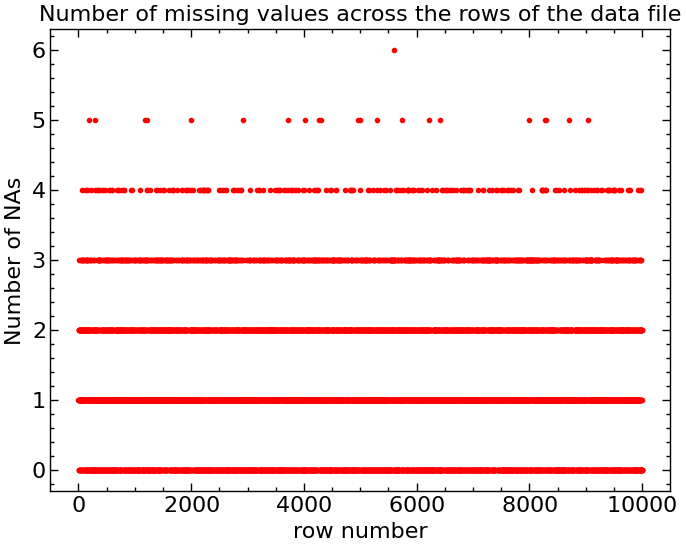

In [ ]:
# Visualize how NAs look across the rows
na_cols = ['Children','Age','Income','Soft_drink','Overweight','Anxiety','Initial_days']
data_df[na_cols].isna().sum(axis=1).plot(
    title ='Number of missing values across the rows of the data file',
    style='.', color='red',ylabel='Number of NAs',xlabel='row number');

From the above plot, it appears that in the default order of the rows, there is no pattern in the NA values. However, we may see a pattern if sorted by some other value.

Let's sort the data frame by the columns and see if some pattern in the NA values appears.

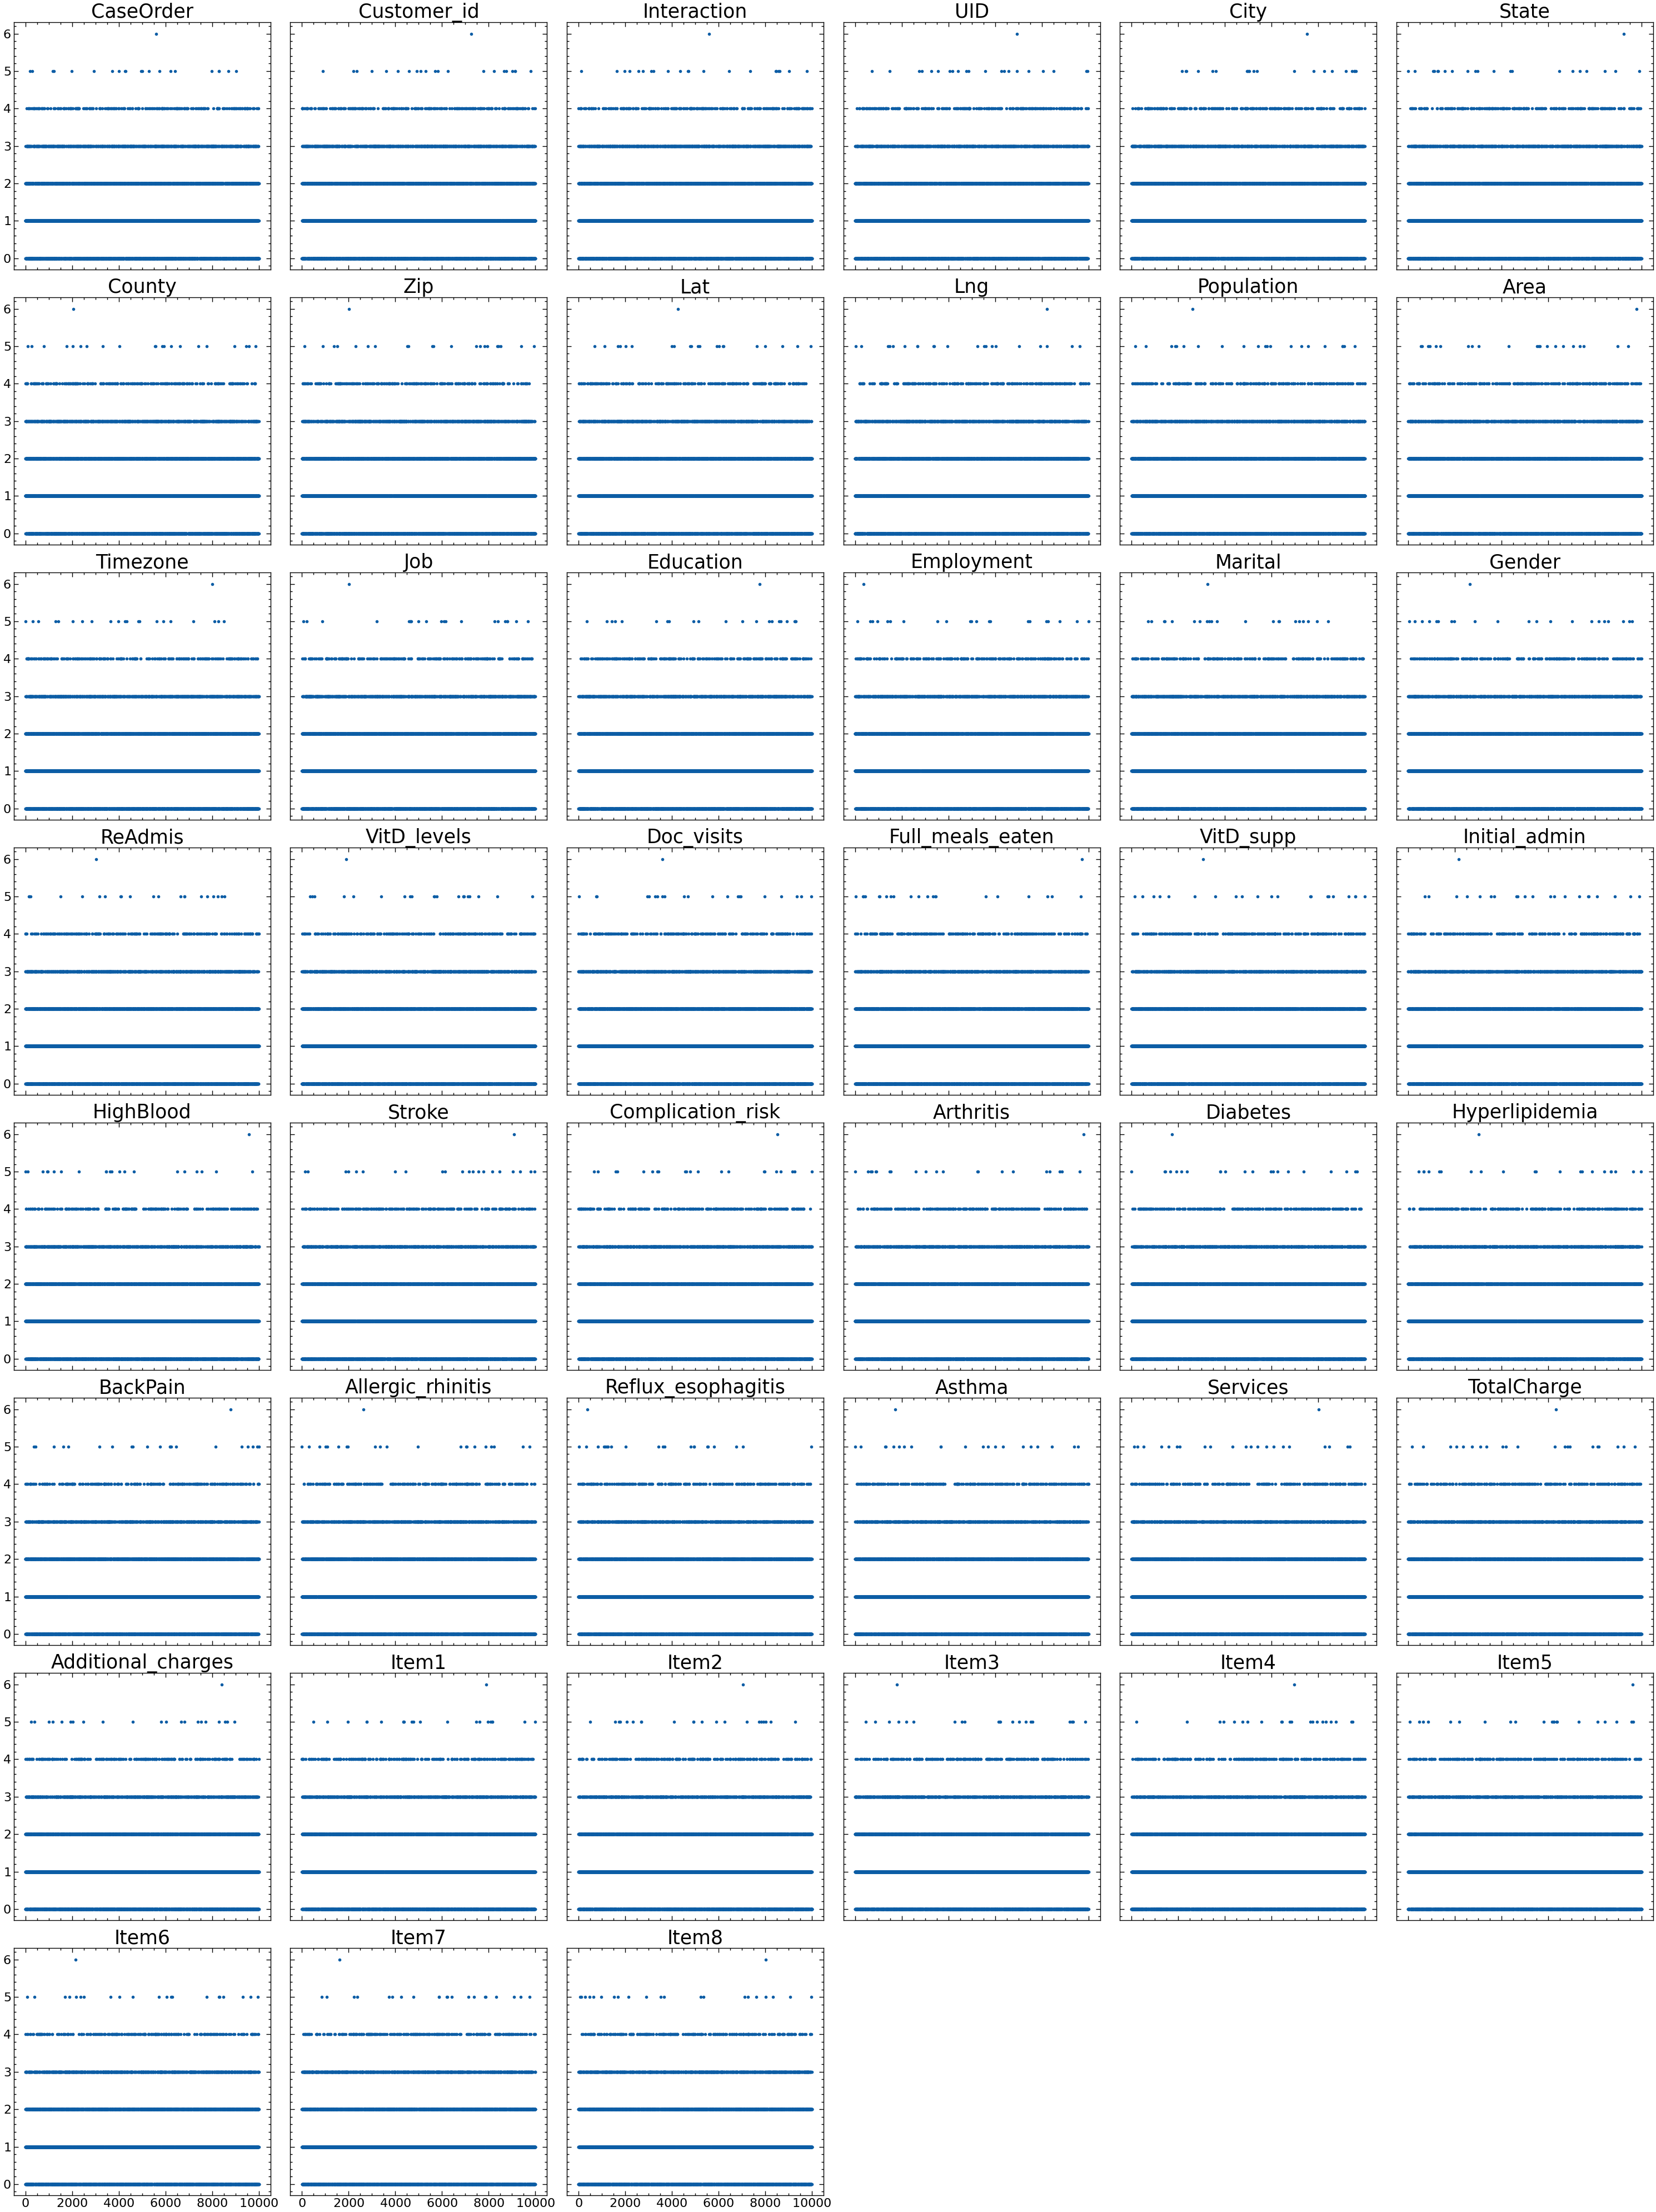

In [ ]:
import numpy as np

# Select all the non NA columns
non_na_cols = [col for col in data_df.columns if not data_df[col].isna().any()]

# Determine the layout of the subplots
num_cols = 6
num_rows = np.ceil(len(non_na_cols) / num_cols)

# Create a figure and a grid of subplots
fig, axs = plt.subplots(
    int(num_rows),
    num_cols,
    figsize=(num_cols*5, num_rows*5),sharex=True,sharey=True)

# Flatten the array of axes
axs = axs.flatten()

# Plot each column in a subplot
for i, col in enumerate(non_na_cols):
    axs[i].plot(
        data_df.sort_values(col).isna().sum(axis=1).values,
        marker='.', linewidth=0)
    axs[i].set_title(col,fontsize=25)

# Remove unused subplots
for ax in axs[len(non_na_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()


Investigating the results of the non-NA plots, we found that there does not appear to be any pattern in the NA values, leading us to conclude that these errors are random.

Based on the above results, imputation methods should be used to elminate these missing values.

#### Determining if columns or rows need to be dropped

Before considering data-imputation techniques for handling missing data, let's examine the missing data to determine if any columns or rows should be dropped from the data set.

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage_cols = (
    (data_df.isnull().sum() / len(data_df)) * 100
    # Sorted from high to low, selecting the top 8 columns
    ).sort_values(ascending=False)[:8]

print("Percentage of missing values per column:\n", missing_percentage_cols)

# Calculate the percentage of missing values for each row
missing_percentage_rows = (
    # Select only those rows with 1 or more NaN
    data_df.isnull().sum(axis=1)>=1
    ).sum()/len(data_df) * 100
print(
    f"\nPercentage of rows with a missing value: {missing_percentage_rows:.2f}%"
    )


Percentage of missing values per column:
 Children             25.88
Soft_drink           24.67
Income               24.64
Age                  24.14
Initial_days         10.56
Anxiety               9.84
Overweight            9.82
Complication_risk     0.00
dtype: float64

Percentage of rows with a missing value: 76.87%


Based on the results above, none of the columns meet the 60% missing data threshold to be dropped. Also, a significant amount of rows contain missing values, failing to meet the threshold of 5% or less of rows containing missing values necessary for consideration of deleting rows with missing values. What this means is that we have a majority of our rows containing missing values while at the same time having columns with many non-missing values. So we need to determine some way to fill in these missing values, since deletion is not an option, as this would leave us with no data to answer our research question.

#### Determining data imputation method

Next, let's review the distribution for each column with NA values and identify what approach we might take for each column for data imputation.

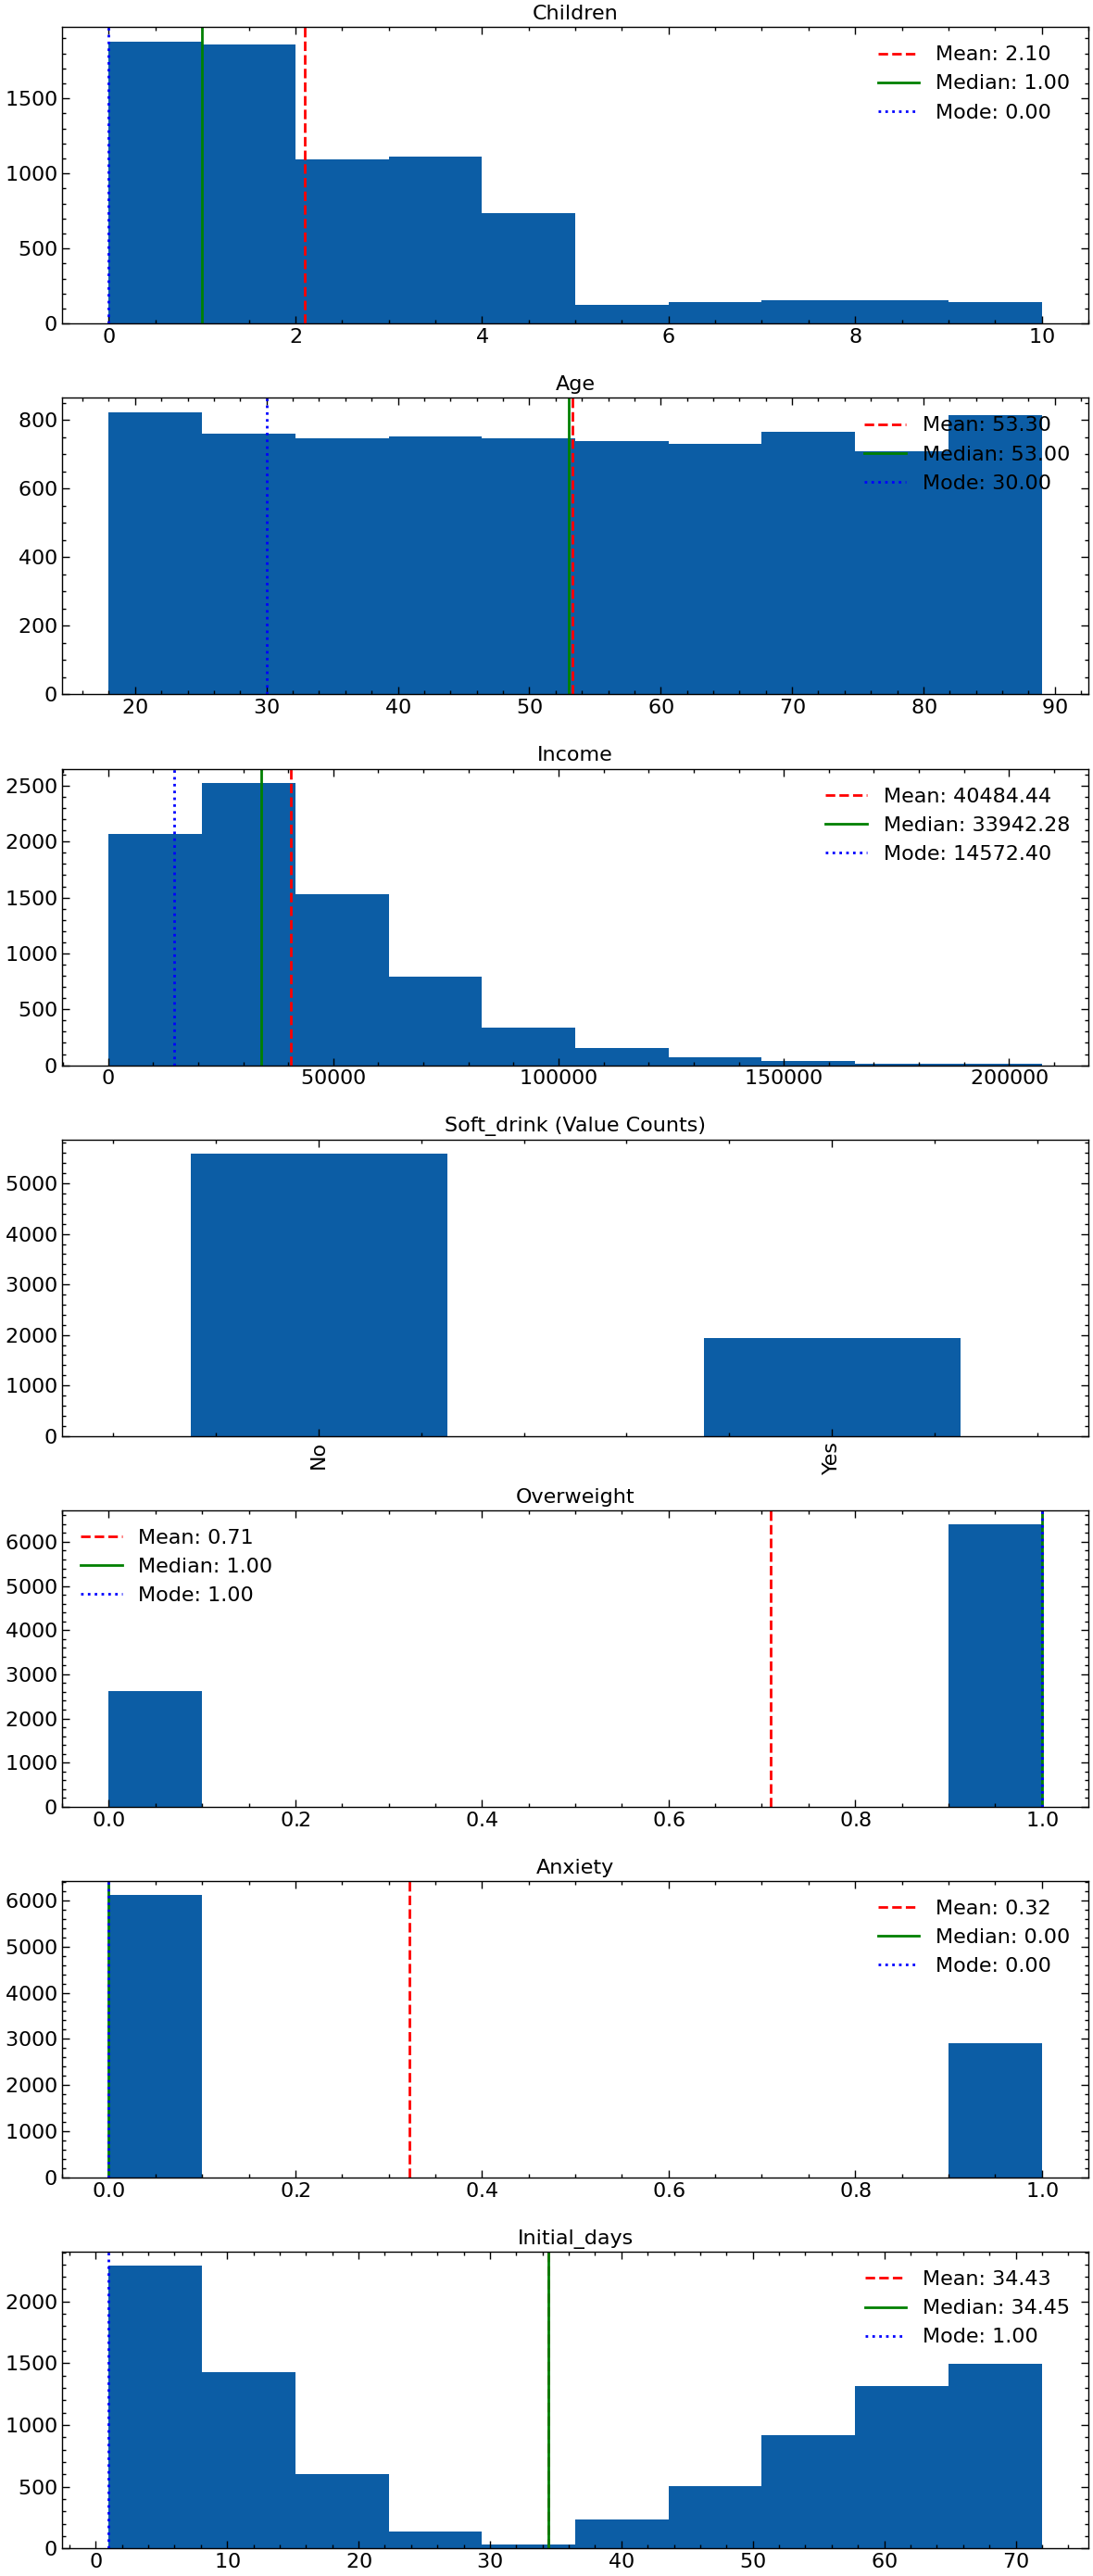

In [ ]:
# Create a figure and a grid of subplots
na_cols = ['Children','Age','Income','Soft_drink','Overweight','Anxiety','Initial_days']
fig, axs = plt.subplots(7, 1, figsize=(12, 28))
axs = axs.flatten()

# Iterate over columns with NA values
for i, col in enumerate(na_cols):
    ax = axs[i]

    # Handle different data types
    if data_df[col].dtype == 'object':
        # For string columns, plot value counts
        data_df[col].value_counts().plot(kind='bar', ax=ax,xlabel='')
        ax.set_title(f"{col} (Value Counts)")
    else:
        # For numeric columns, plot histogram
        data_df[col].hist(ax=ax, grid=False)
        ax.set_title(col)

        # Calculate and display mean, median, and mode
        mean = data_df[col].mean()
        median = data_df[col].median()
        mode = data_df[col].mode()[0]  # Mode might return multiple values, take the first
        ax.axvline(mean, color='r', linestyle='--', label=f"Mean: {mean:.2f}")
        ax.axvline(median, color='g', linestyle='-', label=f"Median: {median:.2f}")
        ax.axvline(mode, color='b', linestyle=':', label=f"Mode: {mode:.2f}")
        ax.legend()


plt.tight_layout()


From the above charts, we see several distributions for each column with missing values. *Children* and *Age* both appear right-skewed, so using the median as a univariate method for imputation would be more appropriate in this case. *Intial_days*, on the other hand, appears to have a bimodal distribution, but this data is comprised of float values, and thus, pandas can not find a single mode value as all values in the column are different. To handle this column as well as the binary columns, *Soft_drink*, *Overweight*, and *Anxiety*, we will need to find some other method that fills in the missing values without introducing information that is not meant to be there. We also have a uniform distribution in the *Age* column. We could use univariate methods for all of these columns, but this may distort the distribution for each column and ignore the relationships between the other variables in any row. For example, say there is a solid positive relationship between *Age* and the *Education* column; if we utilize the mean for the *Age* column, we may distort that relationship. Therefore, we would like to use some more sophisticated imputation method that attempts to account for these inter-variable relationships. For this reason I will use Multiple Imputation methods.

### Outliers

The first thing we will do to detect outliers is to examine Z-scores for each column.

In [ ]:
quan_cols = ['CaseOrder', 'Population',
             'Children', 'Age',
             'Income',  'VitD_levels',
             'Doc_visits', 'Full_meals_eaten',
             'VitD_supp', 'Initial_days',
             'TotalCharge', 'Additional_charges',
             'Item1', 'Item2',
             'Item3', 'Item4',
             'Item5', 'Item6',
             'Item7', 'Item8']

# Calculate z-scores for quantitative columns
data_quan_df = data_df[quan_cols]

data_z_scores = (
    data_quan_df - data_quan_df.mean(numeric_only=True
                                     )) / data_quan_df.std(numeric_only=True)

# Identify outliers
outlier_z_df = data_z_scores.abs() > 3

# Print outliers for each column
outliers = data_quan_df[outlier_z_df].dropna(how='all').dropna(how='all',axis=1)
outliers


,Population,Children,Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,TotalCharge,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
12,NaN,NaN,NaN,47.813476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,167105.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,132963.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9930,NaN,NaN,NaN,44.494793,NaN,NaN,NaN,18847.70517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9934,NaN,NaN,NaN,45.440725,NaN,NaN,NaN,19409.18352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9974,NaN,NaN,NaN,47.439599,NaN,NaN,NaN,18579.48149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9983,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It would also help to visualize the outliers.

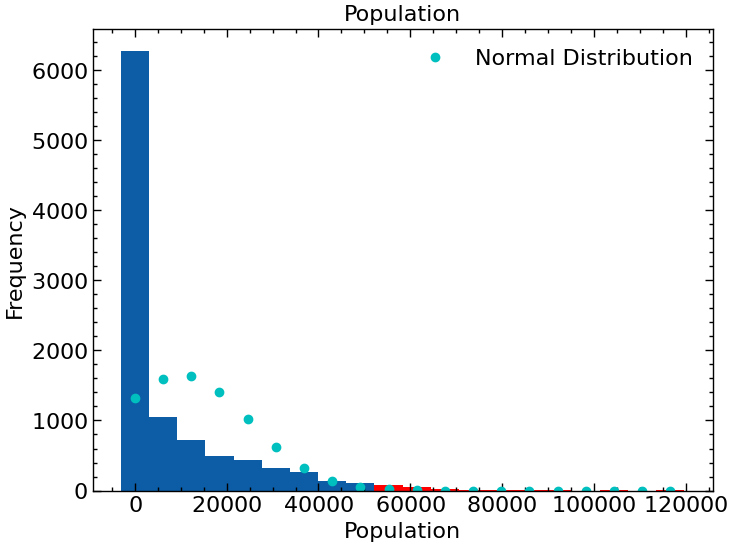

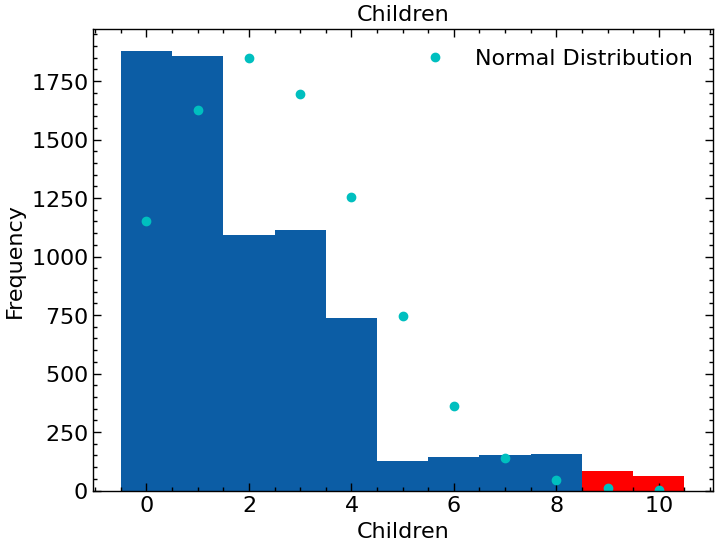

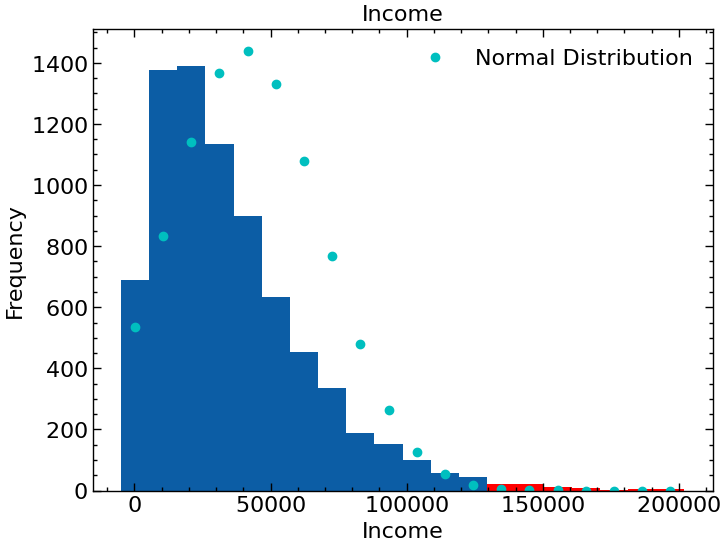

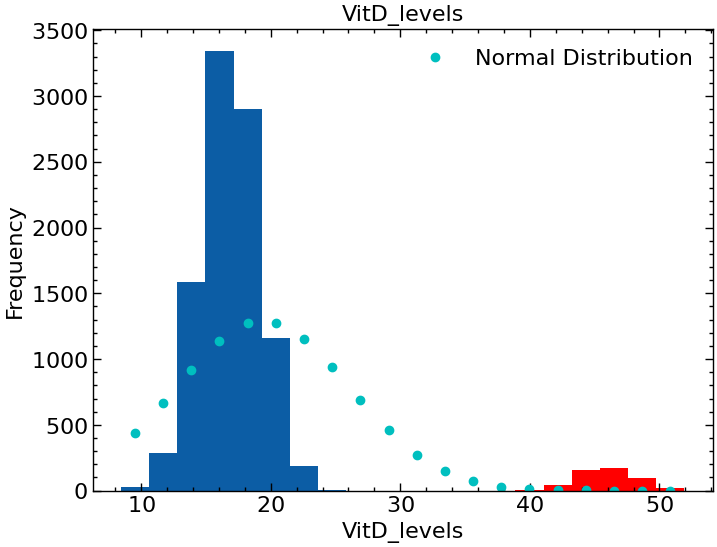

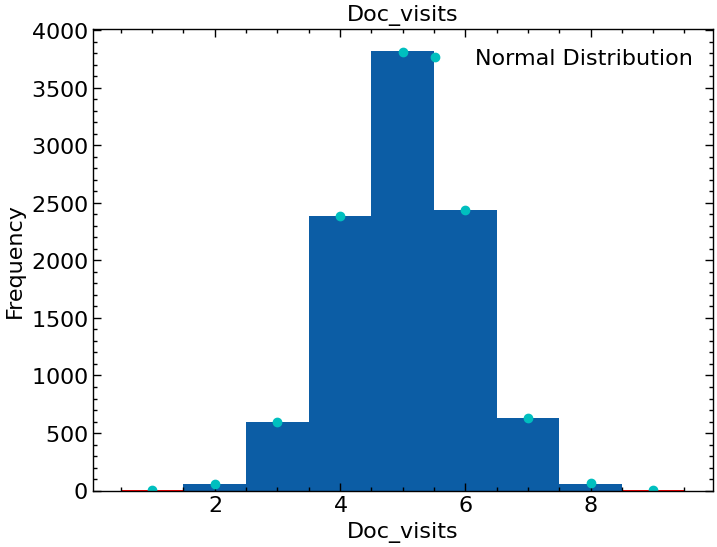

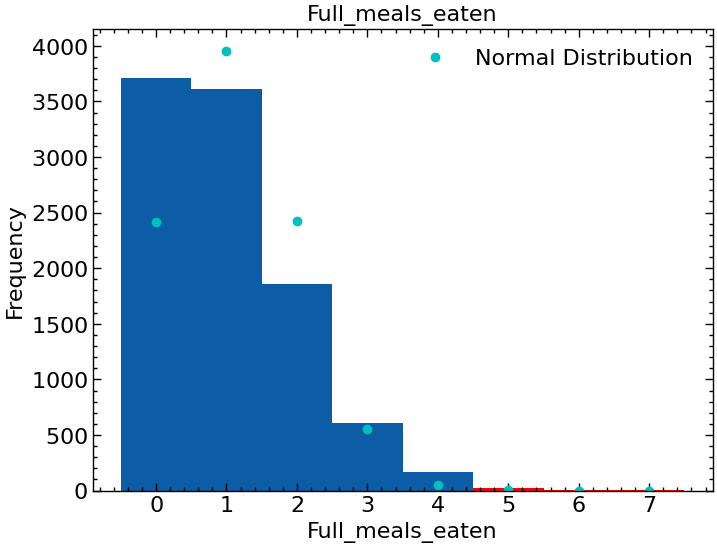

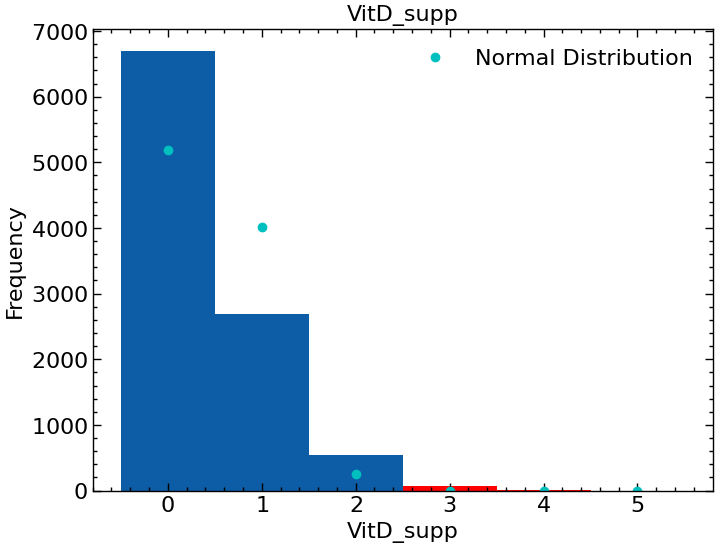

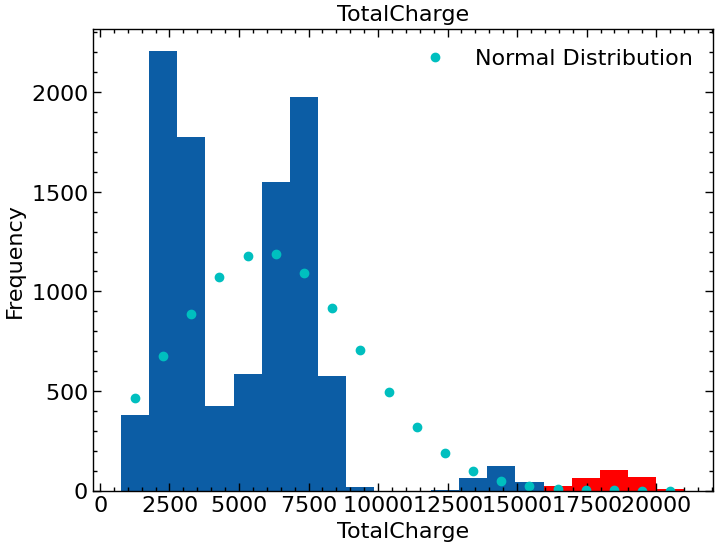

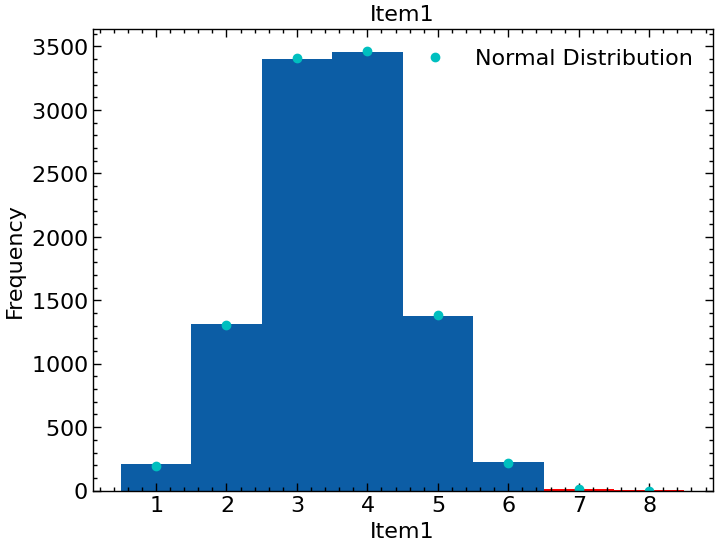

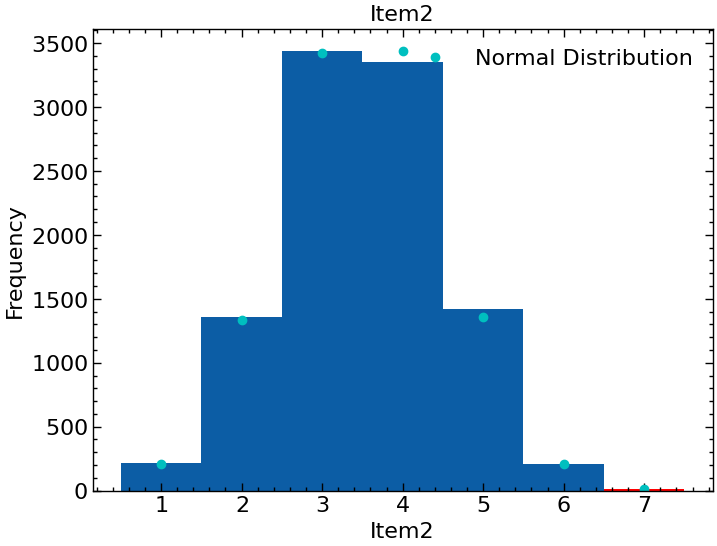

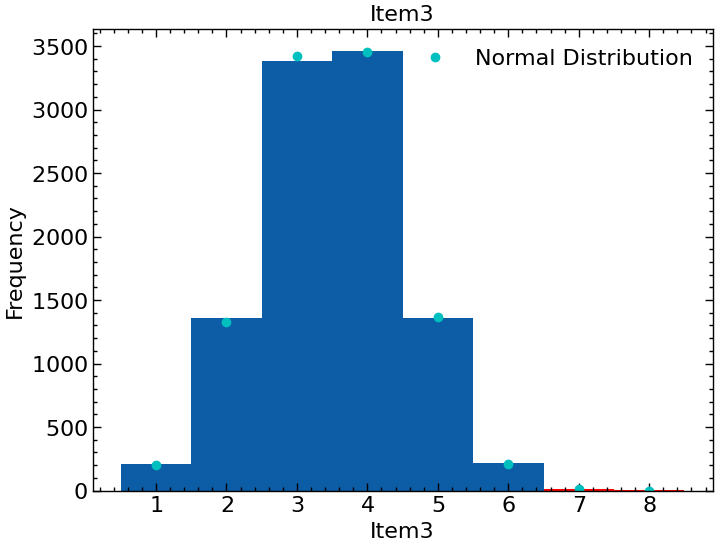

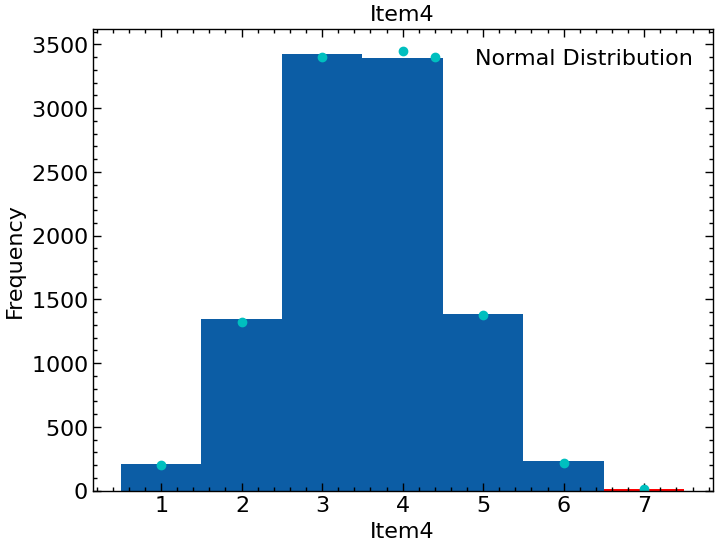

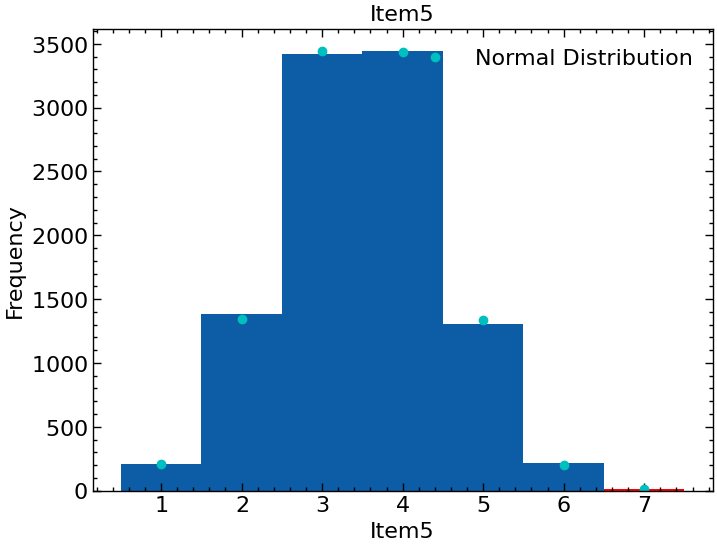

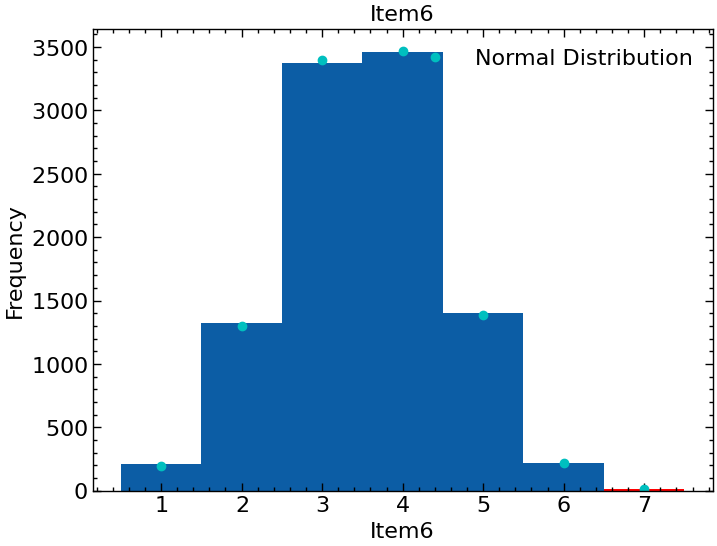

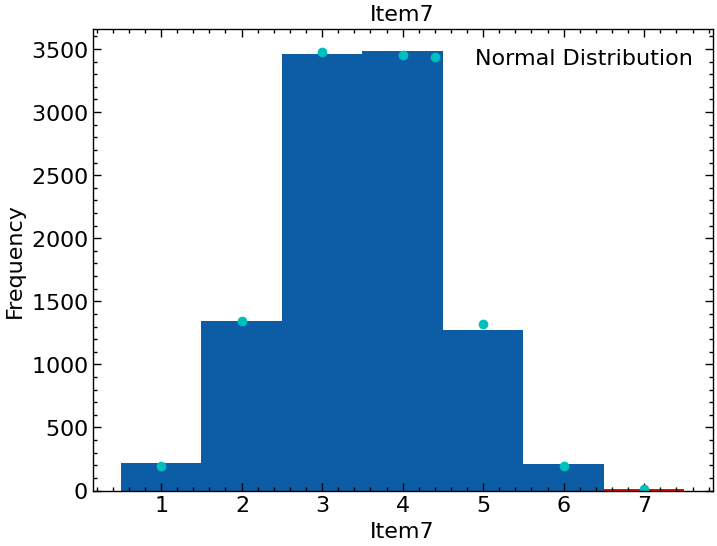

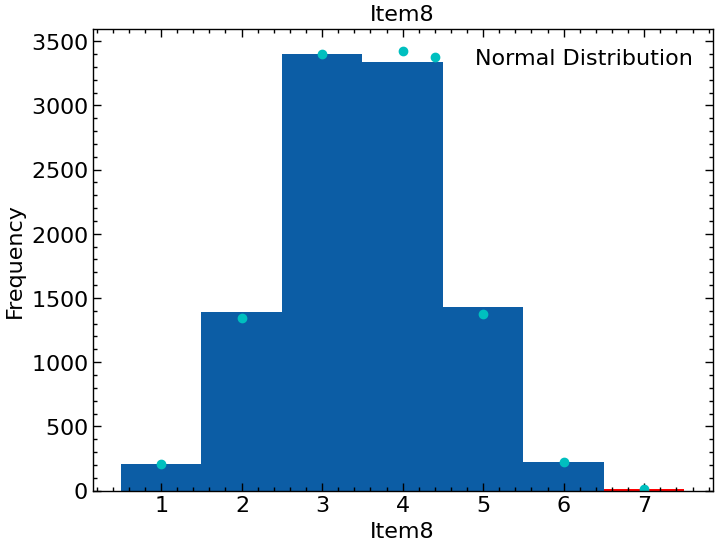

In [ ]:
import scipy.stats as stats

# Plot histograms for columns with outliers, highlighting outlier bins
for col in outliers.columns:
    data = data_quan_df[col]

    # Determine the number of unique values in the column
    unique_values = data.nunique()

    # Define bin edges
    # Use 20 bins for columns with more than 20 unique values
    if unique_values > 20:
        bins = 20
    else:  # Use bins of width 1 for columns with 20 or fewer unique values
        # + 2 for range to include the rightmost edge
        bins = np.arange(data.min(), data.max() + 2 )

    fig, ax = plt.subplots()
    _, bins, patches = ax.hist(data, bins=bins, align='left')

    # Calculate mean and standard deviation
    mean = data.mean()
    std_dev = data.std()

    # Identify outlier bins
    outlier_bins = np.where(np.abs((bins[:-1] - mean) / std_dev) > 3)[0]
    #select all but the last bin since bins is greater than patches by 1

    # Color outlier bins differently
    for i in outlier_bins:
        patches[i].set_facecolor('red')

    # Calculate the values of the normal distribution
    p = stats.norm.pdf(bins[:-1], mean, std_dev)
    #scale the distribution to match the bin width
    p *= data.size * np.diff(bins)

    # Plot the values of the normal distribution
    ax.plot(bins[:-1],
                     p, 'co', label='Normal Distribution')

    ax.legend()
    ax.set_title(f'{col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    plt.show()


From the above plots, it’s evident that some points tagged as outliers are genuinely part of the data. They appear infrequently and in quantities that align with what we expect for rare values. This can be seen from the overlaid normal distributions, which provide a sense of what values we would expect if the distribution was normal. However, it’s important to note that not all these distributions are normal, highlighting a key limitation of the Z-score method.

By combining the Z-score method and the histogram, we can refine our results more effectively. Both *VitD_levels* and *TotalCharge* appear to have outliers, although the Z-score method does not capture all of them. Before declaring these as outliers, it’s necessary to determine if they have an erroneous source or if they hold significance to the research question.

For instance, *VitD_levels* could be a bimodal distribution, and the distribution labeled as outliers might actually indicate a significant relationship. These values could be a good predictor of patient readmission, which is significant to our research question. Therefore, we would not want to drop these outliers from the dataset, as that would significantly influence our predictive capabilities.

Similarly, with *TotalCharge*, this distribution is multi-modal, and it may be the case that the distribution is comprised of four distributions. Without further investigation, it would be ill-advised to declare these as outliers.

Since *ReAdmis* is the critical variable in our research question, a step to check if the suspected outliers for *TotalCharge* and *VitD_levels* are significant to the research question is to examine the frequency of re-admission rates for patients falling into these outlier ranges. We can use the histogram to determine our investigation range and then calculate the percentage of readmissions for these patients using *ReAdmis*. This can then be compared to the majority of the data.

In [ ]:
# Declare the suspected outlier cutoff values as determined from the histograms
TotalCharge_outlier_range = 11000
VitD_outlier_range =  30

# Split the suspected outlier columns at the cutoff values, returning the counts
# for ReAdmis column (Yes or No)

TC_outlier_readmin_rate = data_df[
    (data_df['TotalCharge'] > TotalCharge_outlier_range)
    ]['ReAdmis'].value_counts(normalize=True)

TC_nonoutlier_readmin_rate = data_df[
    ~(data_df['TotalCharge'] > TotalCharge_outlier_range)
    ]['ReAdmis'].value_counts(normalize=True)

VitD_outlier_readmin_rate = data_df[
    (data_df['VitD_levels'] > VitD_outlier_range)
    ]['ReAdmis'].value_counts(normalize=True)

VitD_nonoutlier_readmin_rate = data_df[
    ~(data_df['VitD_levels'] > VitD_outlier_range)
    ]['ReAdmis'].value_counts(normalize=True)

# Print the results
print('TC_outlier_readmin_rate:\n', TC_outlier_readmin_rate)
print('TC_nonoutlier_readmin_rate:\n', TC_nonoutlier_readmin_rate)
print('VitD_outlier_readmin_rate:\n', VitD_outlier_readmin_rate)
print('VitD_nonoutlier_readmin_rate:\n', VitD_nonoutlier_readmin_rate)

TC_outlier_readmin_rate:
 ReAdmis
No     0.592
Yes    0.408
Name: proportion, dtype: float64
TC_nonoutlier_readmin_rate:
 ReAdmis
No     0.635263
Yes    0.364737
Name: proportion, dtype: float64
VitD_outlier_readmin_rate:
 ReAdmis
No     0.592
Yes    0.408
Name: proportion, dtype: float64
VitD_nonoutlier_readmin_rate:
 ReAdmis
No     0.635263
Yes    0.364737
Name: proportion, dtype: float64


The above results lead us to believe that these suspected outliers' readmission rates are twice as high. Additional statistical testing could be done when conducting the analysis required to answer the research question. However, at this stage, this is enough to remark that these suspected outliers should NOT be discarded but instead retained in the dataset. Also, we notice that these patients appear to have the same rates, indicating that every suspected *VitD_levels* outlier patient is the same *TotalCharge* suspected outlier patient. This gives further credence to the argument NOT to discard these values. Further in-depth analysis can investigate this relationship further, but this is sufficient for data cleaning.

Based on this investigation, my recommendation for handling outliers in the data is to retain all records.

## C2: JUSTIFICATION OF MITIGATION METHODS

### Re-expression of catergorical variables

To correct the variables that need to be recategorized, I will run the following code:

In [ ]:
# Replace the number values in the trouble columns with strings
data_df['Anxiety'] = data_df['Anxiety'].replace({1.0: 'Yes', 0.0: 'No'})
data_df['Overweight'] = data_df['Overweight'].replace({1.0: 'Yes', 0.0: 'No'})

After running the above code, all qualitative variables will have been recategorized appropriately. I justify this method as it will replace all the categorical variables in the dataset with numeric values to a consistent standard that matches all the other categorical variables. The dictionary in the ```replace()``` command will find all the values that meet the ```1.0``` or ```0.0``` value, and the dictionary will use those as keys to access the values to replace them with. Using this will make all categorical variables in the dataset non-numeric, which was my intention.

### Duplicates

Based on my investigation of the duplicates in the data file, I have decided to retain all duplicate entries. My justification for this method is that these duplicates are not redundant or erroneous data but rather a reflection of the reality that the data is trying to capture. For instance, multiple customers can have the same income, live in areas with the same population, or have the same number of doctor visits. The *Population* column indicates the number of people living within a mile radius, and it’s possible for multiple residences to have the same number of people within a 1-mile radius. The *Income* column might have duplicates because it is possible for multiple people to earn the same amount of money. The *Additional_charges* column could have duplicates because the same services might have identical costs. Therefore, retaining the duplicates without further information is reasonable as they are not causing data quality issues. If any of these assumptions do not hold, I might need to reconsider my strategy for handling duplicates.

### Missing values

Based on my investigation of the data file, I have decided to use multiple imputation methods to clean the missing values. Multiple imputation methods begin using a univariate method, such as the mean and then update the value through successive iterations that consider the other columns in the data set (DataCamp, n.d.). According to DataCamp, multiple imputation assumes that the data is missing at random (MAR). MAR can be defined as a situation where data is missing randomly within the data's columns without a pattern, whereas between columns, there is a definite characteristic to the missing data. This is exactly the situation we have with this data. Since, through my investigation, we determined that there is no pattern to the missing data within each column, but that only a select few columns actually have missing data, this data meets the definition of MAR, and can then use multiple imputation methods. This will hopefully retain the characteristics of the data set while filling in the missing values. Moreover, multiple imputation methods can handle both quantitative and qualitative types of variables and different patterns of missingness. This is useful because three columns with missing values are categorical: *Overweight*, *Soft_drink*, and *Anxiety*. Therefore, given the nature of the missing data in our dataset and the advantages of multiple imputation, this method is the most appropriate choice for handling the missing values in this context.

### Outliers

Based on my investigation of the high and low values in the data file, I have decided that no values in the columns are outliers. Thus, I will keep all values the same while cleaning the data for outliers. I justify this through my investigation, in which the values initially tagged as outliers by the Z-score method were genuinely part of the data. These values, although infrequent, align with what we expect for rare but significant observations.

Using the Z-score method and histogram plots, I determined that columns such as *VitD_levels* and *TotalCharge* appeared to have outliers. However, further analysis showed that these distributions were bimodal or multimodal, indicating that the outliers might have significant relationships relevant to the research question, particularly regarding patient readmission rates. For example, patients with high *VitD_levels* or *TotalCharge* exhibited twice the readmission rates compared to others, which is critical for our analysis.

Therefore, my handling of outliers in the data is to keep all records, making sure that significant patterns and relationships are preserved for accurate analysis.

## C3: SUMMARY OF THE OUTCOMES

### Re-expression of categorical variables

The below code will re-express the categorical variables that need addressing. Notably, it will change the number values ```1.0``` and ```0.0``` to the string values ```Yes``` and ```No``` for the *Anxiety* and *Overweight* columns. To do this, I will use the ```replace()``` function of the pandas package, which takes in a dictionary with the original values to select as keys.

In [ ]:
# Replace the number values in the trouble columns with strings
data_df['Anxiety'] = data_df['Anxiety'].replace({1.0: 'Yes', 0.0: 'No'})
data_df['Overweight'] = data_df['Overweight'].replace({1.0: 'Yes', 0.0: 'No'})

We can examine the qualitative variables again and verify that all categorical variables contain strings.

In [ ]:
# Select all the qualitative variables
qual_vars = ['Customer_id',
             'Interaction',
             'UID',
             'Job',
             'Education',
             'Employment',
             'Marital',
             'Gender',
             'ReAdmis',
             'Soft_drink',
             'Initial_admin',
             'HighBlood',
             'Stroke',
             'Complication_risk',
             'Overweight',
             'Arthritis',
             'Diabetes',
             'Hyperlipidemia',
             'BackPain',
             'Anxiety',
             'Allergic_rhinitis',
             'Reflux_esophagitis',
             'Asthma',
             'Services']

# Print the distinct values and their counts for each selected column
for col in data_df[qual_vars]:
  print(col)
  print(data_df[col].unique())
  print("\n") # Add an empty line for better readability

Customer_id
['C412403' 'Z919181' 'F995323' ... 'R778890' 'E344109' 'I569847']


Interaction
['8cd49b13-f45a-4b47-a2bd-173ffa932c2f'
 'd2450b70-0337-4406-bdbb-bc1037f1734c'
 'a2057123-abf5-4a2c-abad-8ffe33512562' ...
 '1d79569d-8e0f-4180-a207-d67ee4527d26'
 'f5a68e69-2a60-409b-a92f-ac0847b27db0'
 'bc482c02-f8c9-4423-99de-3db5e62a18d5']


UID
['3a83ddb66e2ae73798bdf1d705dc0932' '176354c5eef714957d486009feabf195'
 'e19a0fa00aeda885b8a436757e889bc9' ... '41b770aeee97a5b9e7f69c906a8119d7'
 '2bb491ef5b1beb1fed758cc6885c167a' '95663a202338000abdf7e09311c2a8a1']


Job
['Psychologist, sport and exercise' 'Community development worker'
 'Chief Executive Officer' 'Early years teacher'
 'Health promotion specialist' 'Corporate treasurer' 'Hydrologist'
 'Psychiatric nurse' 'Computer games developer'
 'Production assistant, radio' 'Contractor'
 'Surveyor, planning and development'
 'English as a second language teacher' 'Actuary' 'Media planner'
 'Fast food restaurant manager' 'Horticulturist, comme

### Missing values

The below code will impute the missing values using Multiple Imputation by Chained Equations (MICE).

In [ ]:
# Code source: (DataCamp, n.d.).
!pip install miceforest
from miceforest import ImputationKernel

In [ ]:
# We first need to convert the 'object' datatypes to 'category' for MICE to work
for col in data_df.columns:
    if data_df[col].dtype == 'object':
        data_df[col] = data_df[col].astype('category')

In [ ]:
# We dont want to select some columns that may just slow down the imputation
# These columns will not help in predicting the NA values
cols_to_exclude = ['Customer_id','Interaction','UID','City','State','County','Timezone','Job']
mice_kernel = ImputationKernel(
data = data_df.drop(columns=cols_to_exclude),
save_all_iterations = True,
random_state = 2023
)

In [ ]:
#run for one iteration
mice_kernel.mice(1)
mice_imputation = mice_kernel.complete_data()

Now all NA values in the dataframe should be gone. Let's check the results:

In [ ]:
# Calculate the number of missing values in each column of the original DataFrame
na_cols_original = data_df.drop(columns=cols_to_exclude).isna().sum()

# Calculate the number of missing values in each column of the imputed DataFrame
na_cols_imputed = mice_imputation.isna().sum()

# Compare the results
comparison_df = pd.DataFrame({
    "Original Missing Values": na_cols_original,
    "Imputed Missing Values": na_cols_imputed
})

print(comparison_df)

                    Original Missing Values  Imputed Missing Values
CaseOrder                                 0                       0
Zip                                       0                       0
Lat                                       0                       0
Lng                                       0                       0
Population                                0                       0
Area                                      0                       0
Children                               2588                       0
Age                                    2414                       0
Education                                 0                       0
Employment                                0                       0
Income                                 2464                       0
Marital                                   0                       0
Gender                                    0                       0
ReAdmis                                   0     

Just as expected, we see no more NA values. Now, to confirm that we chose the correct imputation method, let's examine how the distribution of the original data compares to the imputed data.

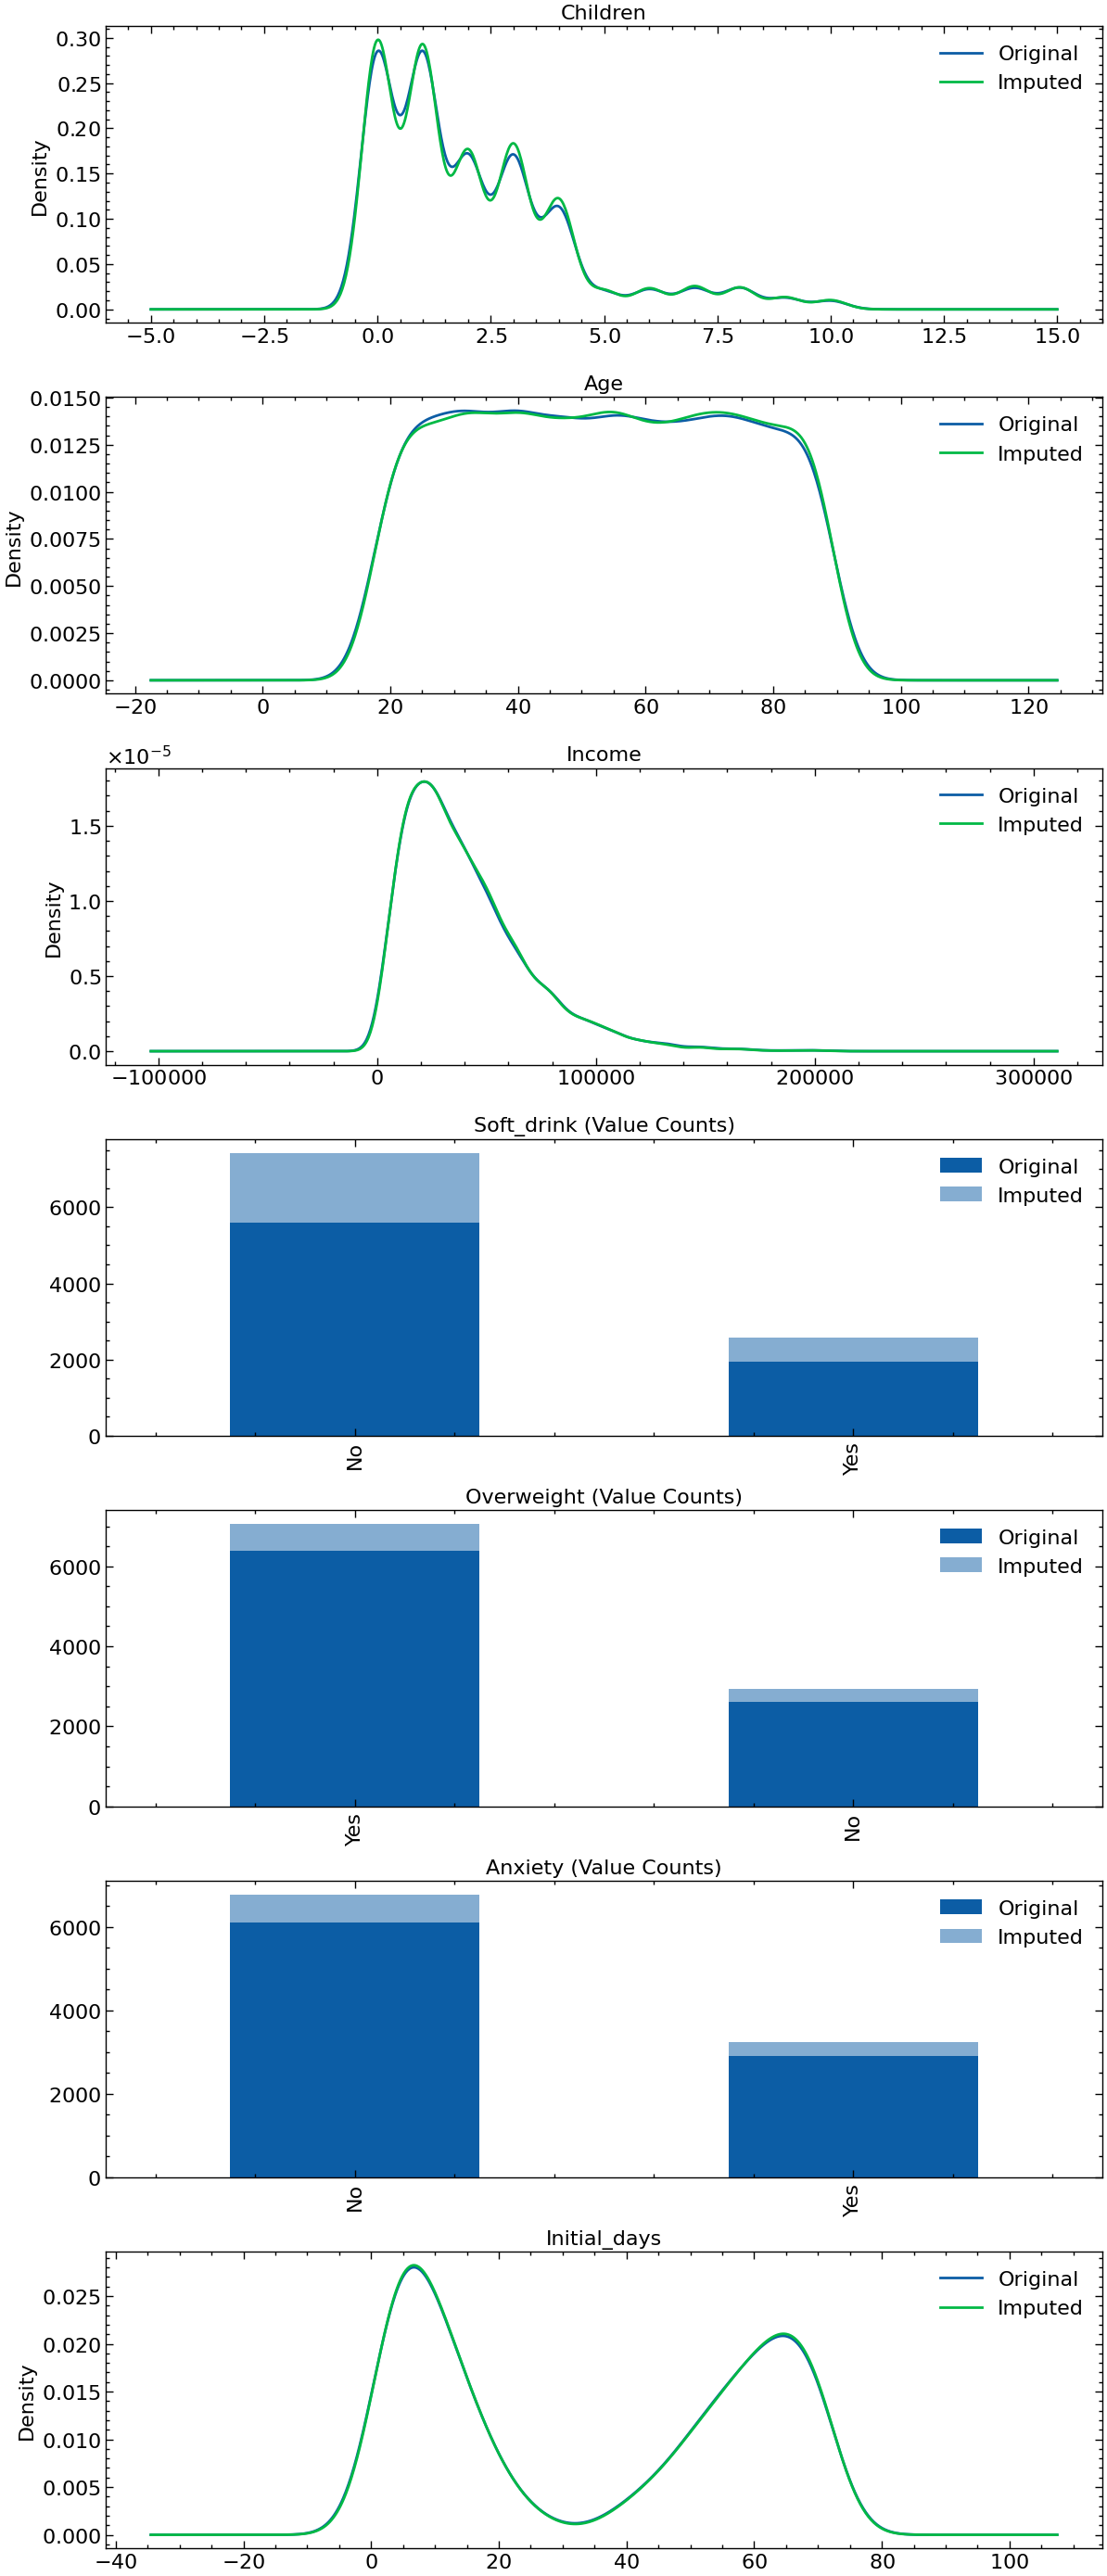

In [ ]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(len(na_cols), 1, figsize=(12, 28))
axs = axs.flatten()

# Iterate over columns with NA values
for i, col in enumerate(na_cols):
    ax = axs[i]

    # Handle different data types
    if data_df[col].dtype == 'category':
        # For string columns, plot value counts
        data_df[col].value_counts().plot(kind='bar',
                                         ax=ax,
                                         alpha=1,
                                         label='Original',
                                         xlabel='')
        mice_imputation[col].value_counts().plot(kind='bar',
                                                 ax=ax,
                                                 alpha=.5,
                                                 label='Imputed',
                                                 xlabel='')
        ax.set_title(f"{col} (Value Counts)")
        ax.legend()
    else:
        # For numeric columns, plot KDE
        data_df[col].plot(kind='kde', ax=ax,  label='Original',title=col)
        mice_imputation[col].plot(kind='kde', ax=ax, label='Imputed')
        ax.legend()
plt.tight_layout()


Even after just 1 itteration, the orginal and imputed data curves are nearly indistinguishable. We have preserved the original distribution and hopefully the inter-variable relationships.

The last step is to complete the process by overwriting the old columns.

In [ ]:
#overwrite the old columns with NA values with the new columns
data_df[na_cols] = mice_imputation[na_cols]

Let's confirm our work.

In [ ]:
#count every instance of a missing value
data_df.isna().sum().sum()

0

There are no more missing values in our data frame.

In summary, through our cleaning process, we have recategorized two columns, ensuring they were strings, and eliminated all missing values through MICE. This data is now cleaned and prepared for analysis!

## C4: LIMITATIONS

Let's quickly summarize how we approached data cleaning for this file:

* Ensured all categorical variables were comprised of string data types
* Imputed missing values using MICE
* Did not remove any outliers
* Did not remove any duplicates

Now, let's address the limitations of each of these decisions.

**Categorical Variables:**

Limitation: The recategorization of qualitative variables could have been better served by employing the One-Hot method. By not taking this approach, should this dataset be used later for machine learning approaches, this step will need to be taken, requiring additional data cleaning.

**Imputation with MICE:**

Limitation: Imputing values using MICE is less straightforward than univariate methods and is somewhat of a black box. While it seems to have achieved the desired outcome based on distributions, it's not immediately clear how it did so. This could introduce spurious relationships that may surface later. Additionally, without proper documentation, the information on which values were imputed may be lost, complicating future analyses.

**Outliers:**

Limitation: Declaring that this dataset contains no outliers may have been applied too liberally. We used the Z-score and histogram approach, comparing values tagged as outliers to the distribution density of the data. However, we did not account for non-normal distributions or use a quantitative method. There may have been outliers that should have been removed, potentially causing issues in further calculations.

**Duplicates:**

Limitation: By deciding to remove no duplicates, we assumed that without additional information, plausible duplicates should be kept. However, if these duplicates are spurious, we allowed incorrect data to pass to the analysis stage, negatively influencing the results.

## C5: IMPACT OF LIMITATIONS

**Categorical Variables:**

Impact: The need for additional data cleaning (One-Hot encoding) for machine learning purposes means future analyses could be delayed or compromised by the need to reformat the data. This extra step could introduce errors or inconsistencies, potentially impacting the accuracy of machine learning models.

**Imputation with MICE:**

Impact: The 'black box' nature of MICE imputation means future analysts may not fully understand how missing values were filled, leading to potential mistrust or misuse of the data. Spurious relationships introduced could skew analyses, leading to incorrect conclusions. Lack of documentation on which values were imputed could further complicate data use.

**Outliers:**

Impact: The decision not to remove outliers could result in analyses influenced by extreme values, potentially leading to misleading conclusions. Since non-normal distributions were not accounted for, some legitimate outliers might still be present, affecting the robustness of statistical analyses and models.

**Duplicates:**

Impact: Allowing potential duplicates to remain in the dataset could lead to biased or inaccurate results. If these duplicates are spurious, they could distort summary statistics and analyses, leading to incorrect interpretations and decisions. This could be particularly problematic in decision-making processes where accuracy is critical, such as in medical or financial contexts.

## D1: MITIGATION CODE

See code attached in file: *d206_linehan.ipynb*.

## D2: CLEAN DATA

In [ ]:
#export data
data_df.to_csv('/content/medical_cleaned_data.csv', index=False)

See attached file: *medical_cleaned_data.csv*.

## E1: PRINCIPAL COMPONENTS

In [ ]:
# Import necessary packages
from sklearn.decomposition import PCA

In [ ]:
# Select numeric columns, excluding categorical and variables with limited range
data_numeric = data_df.select_dtypes(include=np.number).drop(columns=
                                                             [
                                                              'CaseOrder',
                                                              'Zip',
                                                              'Item1',
                                                              'Item2',
                                                              'Item3',
                                                              'Item4',
                                                              'Item5',
                                                              'Item6',
                                                              'Item7',
                                                              'Item8',
                                                             ]
                                                              )
# Normalize columns
data_numeric = (
    data_numeric - data_numeric.mean(numeric_only=True)
    ) / data_numeric.std(numeric_only=True)
print(
    f'Number of principal components: {data_numeric.shape[1]}'
)
print(
    f'Columns used:'
    f'{data_numeric.columns.tolist()}'
)

Number of principal components: 13
Columns used:['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges']


In [ ]:
# Intialize PCA
pca = PCA(n_components=data_numeric.shape[1])
# Fit PCA
pca.fit(data_numeric)
# Transform into dataframe
data_pca_df = pd.DataFrame(pca.transform(data_numeric),
                           columns=[
                               f'PC{i+1}' for i in range(data_numeric.shape[1])
                               ]
                           )

Display PCA loadings table

In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(data_numeric.shape[1])],
    index=data_numeric.columns
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Lat,-0.017308,0.003348,-0.717694,0.039960,-0.069918,-0.103167,-0.076826,0.052907,-0.020547,-0.020017,0.676648,0.009884,-0.000815
Lng,-0.005424,0.007386,0.277088,-0.594107,0.211054,-0.191302,0.312876,-0.411330,-0.143037,-0.242550,0.377678,-0.004326,0.000953
Population,0.020464,-0.029520,0.623464,0.299590,-0.162122,0.138388,-0.195594,0.243993,0.073882,-0.036011,0.608245,0.017536,0.000219
Children,0.035266,0.047942,-0.053724,0.520471,-0.198721,0.175924,0.298102,-0.331929,-0.391208,-0.545616,-0.049074,0.005560,-0.004591
Age,0.130867,0.693001,0.012392,-0.027205,-0.013895,-0.011683,-0.018688,0.015000,-0.002235,0.033209,-0.001273,0.706673,-0.018170
Income,-0.035476,-0.002283,0.055269,0.436389,0.522534,-0.099158,0.225159,-0.275456,-0.174336,0.590127,0.129848,0.017075,0.001892
VitD_levels,0.519258,-0.096507,-0.037034,-0.049947,0.369183,0.096758,0.103448,0.437774,-0.256801,-0.151742,-0.004089,0.019422,0.528978
Doc_visits,-0.004613,0.015264,0.021549,0.174710,0.435478,-0.374039,-0.664261,-0.199062,0.054190,-0.388064,-0.069370,-0.000475,-0.001079
Full_meals_eaten,-0.006619,0.030063,-0.099327,0.030808,0.375056,0.611724,0.112676,-0.164018,0.626832,-0.191656,0.063371,0.009658,-0.002548
VitD_supp,0.029546,0.012288,0.030928,0.240233,-0.003910,-0.599533,0.486205,0.238922,0.497821,-0.197049,-0.026687,-0.000164,0.002619


## E2: CRITERIA USED

In [ ]:
# Code source:
# Video 1: Getting Started with D206 | Principal Component Analysis (PCA)
cov_matrix = np.dot(
    data_numeric.T, data_numeric
) / data_numeric.shape[0]

eigenvalues = [
    np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector))
    for eigenvector in pca.components_
]


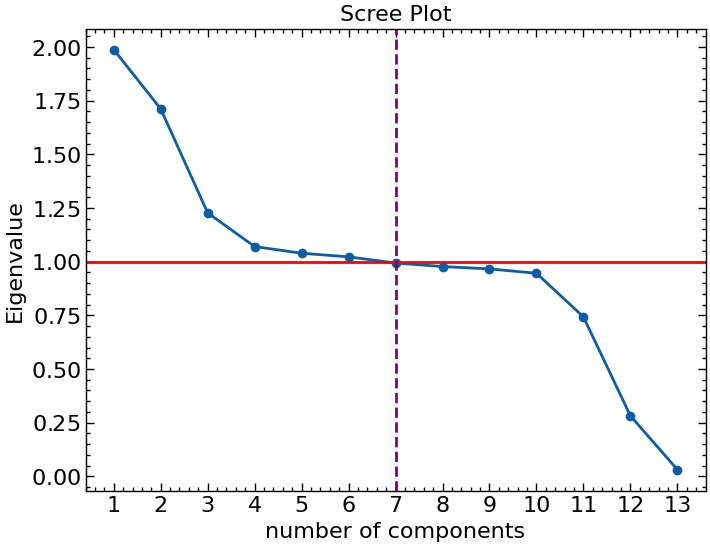

In [ ]:
plt.plot(eigenvalues,marker='o',)
plt.title('Scree Plot')
plt.xlabel('number of components')
plt.ylabel('Eigenvalue')
plt.axhline(y=1,
            color='red',
            )
plt.xticks(range(data_numeric.shape[1]),
           labels=range(1, data_numeric.shape[1]+1));
plt.axvline(x=6, color='purple',linestyle='--')

In [ ]:
# Examine eigenvalues between PC6 and PC7.
print(f'Eigenvalue of PC6: {eigenvalues[5]:.2f}')
print(f'Eigenvalue of PC7: {eigenvalues[6]:.2f}')

Eigenvalue of PC6: 1.02
Eigenvalue of PC7: 0.99


In [ ]:
loadings.iloc[:,np.where(np.array(eigenvalues) >= 1)[0]]

,PC1,PC2,PC3,PC4,PC5,PC6
Lat,-0.017308,0.003348,-0.717694,0.039960,-0.069918,-0.103167
Lng,-0.005424,0.007386,0.277088,-0.594107,0.211054,-0.191302
Population,0.020464,-0.029520,0.623464,0.299590,-0.162122,0.138388
Children,0.035266,0.047942,-0.053724,0.520471,-0.198721,0.175924
Age,0.130867,0.693001,0.012392,-0.027205,-0.013895,-0.011683
Income,-0.035476,-0.002283,0.055269,0.436389,0.522534,-0.099158
VitD_levels,0.519258,-0.096507,-0.037034,-0.049947,0.369183,0.096758
Doc_visits,-0.004613,0.015264,0.021549,0.174710,0.435478,-0.374039
Full_meals_eaten,-0.006619,0.030063,-0.099327,0.030808,0.375056,0.611724
VitD_supp,0.029546,0.012288,0.030928,0.240233,-0.003910,-0.599533


Based on the above scree-plot, select components PC1 through PC6. From the scree-plot, these components all have eigenvalues above 1, and according to the Kaiser rule, these would be the components we would select. Additionally,  according to the scree plot test, we would choose those just above the elbow, which would be components four and below, so selecting up to 6 still reduces our number of components by half, but while providing the variability explained.

## E3: BENEFITS

There are several benefits to using Principal Component Analysis (PCA). One significant advantage is its ability to prevent overfitting. Overfitting occurs when a model is too specialized due to the inclusion of an excessive number of variables, rendering it ineffective at accurately predicting new scenarios. By eliminating certain components, the risk of overfitting is reduced. However, the question arises: which components are best to eliminate? This is where PCA proves invaluable. It provides an effective method for reducing the number of variables in combination with selection methods such as the Kaiser rule. Implementing this strategy allows the model to adapt more flexibly to new scenarios, thereby enhancing its predictive accuracy.

# F: VIDEO

Video can be located at the following link:

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=abe9f85a-0231-4f37-93fc-b1b801693178


# G: SOURCES OF THIRD-PARTY CODE

DataCamp. (n.d.). Techniques to Handle Missing Data Values. Retrieved from https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values

# H: SOURCES

CMS Office of Minority Health. (2020). *Impact of hospital readmissions reduction initiatives on vulnerable populations*. Centers for Medicare & Medicaid Services. https://www.cms.gov/files/document/impact-readmissions-reduction-initiatives-report.pdf

DataCamp. (n.d.). Techniques to Handle Missing Data Values. Retrieved from https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values

Investopedia. (n.d.). The empirical rule. Retrieved July 23, 2024, from https://www.investopedia.com/terms/e/empirical-rule.asp#:~:text=The%20empirical%20rule%20states%20that,standard%20deviations%20from%20the%20mean